(32, 32, 4)


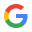

In [1]:
from importlib import reload
from IPython.display import HTML, clear_output
from os import walk
from PIL import Image
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.datasets import mnist
import h5py

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from util import load_data, random_samples, interpolation, animation

# Test
img = Image.open("scrapper/faviconpngs2/google.com.png")

# Convert image to array
np_img = np.array(img)
print(np_img.shape)
# and back
Image.fromarray(np_img, 'RGBA')

In [2]:
mode = 3

In [3]:
imgs = load_data('scrapper/faviconpngs2/', mode)

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [ ]:
imgs[3].shape

In [ ]:
# Filter out images with strange dimensions
desired_shape = (32, 32, mode)

print('num images before: ' + str(len(imgs)))
imgs = [img for img in imgs if img.shape == desired_shape]
print('num images after: ' + str(len(imgs)))

In [ ]:
random_samples(imgs, mode)

In [3]:
#X_train = np.asarray(imgs)
with h5py.File('LLD-icon-sharp.hdf5', 'r') as f:
    data = f['data'][()]
desired_shape = (32, 32, mode)

In [4]:
X_train = data.transpose((0,2,3,1))

In [5]:
import wgangp as gan_module
reload(gan_module)
GAN = gan_module.WGANGP

Using TensorFlow backend.


In [6]:
save_path = "icons/"
gan = GAN(desired_shape, save_path=save_path)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2048)         206848      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 4, 4, 128)    0           dense_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4, 4, 128)    0           reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
d_loss, d_acc, g_loss = gan.train(X_train=X_train, epochs=30000, batch_size=32, sample_interval=200)
clear_output()

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 6.727138] [G loss: 1.185997]
1 [D loss: 5.675617] [G loss: 1.159457]
2 [D loss: 5.352914] [G loss: 1.047342]
3 [D loss: 4.761270] [G loss: 0.944427]
4 [D loss: 4.345364] [G loss: 0.825373]
5 [D loss: 4.530126] [G loss: 0.689006]
6 [D loss: 4.881443] [G loss: 0.390904]
7 [D loss: 6.449181] [G loss: 0.215205]
8 [D loss: 6.719089] [G loss: 0.363841]
9 [D loss: 5.001812] [G loss: 0.670448]
10 [D loss: 2.345724] [G loss: 0.672854]
11 [D loss: 4.023047] [G loss: 2.849781]
12 [D loss: 2.342544] [G loss: 2.079972]
13 [D loss: 2.109851] [G loss: 2.196985]
14 [D loss: 2.989478] [G loss: 1.662534]
15 [D loss: 2.682252] [G loss: 2.131384]
16 [D loss: 2.097060] [G loss: 1.717907]
17 [D loss: 1.568041] [G loss: 2.066154]
18 [D loss: 1.777659] [G loss: 2.021587]
19 [D loss: 0.713857] [G loss: 2.775243]
20 [D loss: 1.244345] [G loss: 1.692928]
21 [D loss: 1.071219] [G loss: 2.518119]
22 [D loss: -0.755224] [G loss: 3.280441]
23 [D loss: -0.602235] [G loss: 3.460959]
24 [D loss: -1.219429] [

190 [D loss: -10.834334] [G loss: 86.674957]
191 [D loss: -7.944809] [G loss: 87.223488]
192 [D loss: -8.365864] [G loss: 87.452423]
193 [D loss: -9.587328] [G loss: 87.337631]
194 [D loss: -11.347253] [G loss: 89.623093]
195 [D loss: -12.202732] [G loss: 85.574951]
196 [D loss: -8.049454] [G loss: 92.185181]
197 [D loss: -7.964390] [G loss: 89.441833]
198 [D loss: -10.252930] [G loss: 90.795280]
199 [D loss: -6.217197] [G loss: 93.310364]
200 [D loss: -7.353475] [G loss: 92.233742]
201 [D loss: -12.208179] [G loss: 93.697144]
202 [D loss: -9.375365] [G loss: 92.182701]
203 [D loss: -10.499844] [G loss: 92.712341]
204 [D loss: -9.882326] [G loss: 95.209000]
205 [D loss: -8.702679] [G loss: 93.030838]
206 [D loss: -8.403461] [G loss: 93.633926]
207 [D loss: -9.231975] [G loss: 93.623932]
208 [D loss: -9.845360] [G loss: 91.593521]
209 [D loss: -5.411920] [G loss: 96.085632]
210 [D loss: -8.733186] [G loss: 95.693222]
211 [D loss: -9.727275] [G loss: 94.001053]
212 [D loss: -8.502750] [G

372 [D loss: -11.729949] [G loss: 174.669647]
373 [D loss: -11.780543] [G loss: 172.955917]
374 [D loss: -12.094475] [G loss: 173.782730]
375 [D loss: -14.382285] [G loss: 175.461090]
376 [D loss: -15.108948] [G loss: 177.530563]
377 [D loss: -16.491236] [G loss: 174.486603]
378 [D loss: -15.176147] [G loss: 178.097015]
379 [D loss: -12.334100] [G loss: 175.392365]
380 [D loss: -15.358892] [G loss: 180.352448]
381 [D loss: -8.518277] [G loss: 181.265015]
382 [D loss: -15.605566] [G loss: 181.747864]
383 [D loss: -15.982177] [G loss: 180.772156]
384 [D loss: -18.394554] [G loss: 181.636047]
385 [D loss: -15.153987] [G loss: 184.362640]
386 [D loss: -11.748636] [G loss: 185.278214]
387 [D loss: -14.390566] [G loss: 184.200836]
388 [D loss: -11.254849] [G loss: 184.178848]
389 [D loss: -15.845481] [G loss: 182.555206]
390 [D loss: -14.583963] [G loss: 188.622864]
391 [D loss: -10.069549] [G loss: 188.322083]
392 [D loss: -18.501827] [G loss: 186.458023]
393 [D loss: -11.478385] [G loss: 1

551 [D loss: -23.832296] [G loss: 310.521027]
552 [D loss: -21.787441] [G loss: 311.324066]
553 [D loss: -46.170052] [G loss: 306.963165]
554 [D loss: -28.704205] [G loss: 313.650757]
555 [D loss: -35.441132] [G loss: 309.810028]
556 [D loss: -14.323177] [G loss: 303.111786]
557 [D loss: -34.075790] [G loss: 305.954468]
558 [D loss: -23.542618] [G loss: 318.635742]
559 [D loss: -15.144799] [G loss: 314.306946]
560 [D loss: -19.339836] [G loss: 301.008423]
561 [D loss: -13.506149] [G loss: 306.747009]
562 [D loss: 28.388523] [G loss: 306.561218]
563 [D loss: -9.856672] [G loss: 302.552155]
564 [D loss: -36.582092] [G loss: 299.419250]
565 [D loss: -28.357449] [G loss: 314.332947]
566 [D loss: -34.958096] [G loss: 312.741211]
567 [D loss: -6.636975] [G loss: 317.524170]
568 [D loss: -12.461026] [G loss: 317.815033]
569 [D loss: -41.978989] [G loss: 315.736267]
570 [D loss: -39.313148] [G loss: 315.400635]
571 [D loss: -38.382278] [G loss: 313.292297]
572 [D loss: -25.483379] [G loss: 326

730 [D loss: -24.615717] [G loss: 432.691345]
731 [D loss: -55.589233] [G loss: 424.588135]
732 [D loss: -35.593864] [G loss: 412.208923]
733 [D loss: -38.592720] [G loss: 438.801605]
734 [D loss: -38.654411] [G loss: 438.770233]
735 [D loss: -50.064190] [G loss: 439.341003]
736 [D loss: -23.257843] [G loss: 435.665436]
737 [D loss: -47.248428] [G loss: 439.154724]
738 [D loss: -50.150772] [G loss: 441.716919]
739 [D loss: -53.269958] [G loss: 442.997192]
740 [D loss: -32.877670] [G loss: 441.220673]
741 [D loss: -51.360374] [G loss: 444.026825]
742 [D loss: -39.345264] [G loss: 439.834137]
743 [D loss: -36.703575] [G loss: 440.438843]
744 [D loss: -30.454857] [G loss: 430.335754]
745 [D loss: -58.686901] [G loss: 440.771606]
746 [D loss: -14.270863] [G loss: 410.460205]
747 [D loss: -49.932552] [G loss: 436.514587]
748 [D loss: -31.486649] [G loss: 446.918640]
749 [D loss: -30.628836] [G loss: 436.042297]
750 [D loss: -46.366863] [G loss: 447.595093]
751 [D loss: -35.797211] [G loss: 

909 [D loss: -11.187613] [G loss: 526.135803]
910 [D loss: -36.549961] [G loss: 532.877502]
911 [D loss: -8.426929] [G loss: 539.001892]
912 [D loss: -79.064743] [G loss: 533.997559]
913 [D loss: -43.200581] [G loss: 543.149658]
914 [D loss: -90.338821] [G loss: 542.583435]
915 [D loss: -2.707932] [G loss: 543.479980]
916 [D loss: -54.273979] [G loss: 543.733643]
917 [D loss: -87.180359] [G loss: 542.549438]
918 [D loss: -32.174507] [G loss: 548.326477]
919 [D loss: -18.842316] [G loss: 515.258057]
920 [D loss: -11.363752] [G loss: 542.250610]
921 [D loss: -17.178003] [G loss: 546.779663]
922 [D loss: -48.145752] [G loss: 561.376099]
923 [D loss: -27.839752] [G loss: 570.496216]
924 [D loss: -37.097984] [G loss: 566.511353]
925 [D loss: 12.269913] [G loss: 546.673340]
926 [D loss: -36.523304] [G loss: 537.190979]
927 [D loss: -38.593220] [G loss: 576.249451]
928 [D loss: -28.607622] [G loss: 575.520630]
929 [D loss: -49.098900] [G loss: 554.812378]
930 [D loss: -71.441071] [G loss: 554

1086 [D loss: -65.220551] [G loss: 637.384399]
1087 [D loss: -6.719966] [G loss: 684.621948]
1088 [D loss: -37.762093] [G loss: 681.099243]
1089 [D loss: -34.016289] [G loss: 684.784180]
1090 [D loss: -40.587502] [G loss: 691.307617]
1091 [D loss: -56.496899] [G loss: 675.062256]
1092 [D loss: -39.761337] [G loss: 698.177673]
1093 [D loss: 702.982361] [G loss: 644.870605]
1094 [D loss: -9.086624] [G loss: 640.766235]
1095 [D loss: -14.157651] [G loss: 650.329468]
1096 [D loss: -13.417506] [G loss: 651.766113]
1097 [D loss: -12.354235] [G loss: 650.898315]
1098 [D loss: -10.556836] [G loss: 658.280884]
1099 [D loss: -14.364083] [G loss: 649.379700]
1100 [D loss: -12.246510] [G loss: 648.356018]
1101 [D loss: -51.855450] [G loss: 639.701660]
1102 [D loss: -42.771049] [G loss: 662.728638]
1103 [D loss: -24.558430] [G loss: 647.118347]
1104 [D loss: -34.889214] [G loss: 659.910339]
1105 [D loss: -33.401360] [G loss: 659.882446]
1106 [D loss: -100.622383] [G loss: 664.992004]
1107 [D loss: 

1260 [D loss: -60.606319] [G loss: 826.425110]
1261 [D loss: -57.539196] [G loss: 834.362366]
1262 [D loss: -119.178001] [G loss: 837.635864]
1263 [D loss: -151.791245] [G loss: 836.713501]
1264 [D loss: -65.195000] [G loss: 826.872192]
1265 [D loss: -101.990318] [G loss: 832.497742]
1266 [D loss: -38.640469] [G loss: 744.744629]
1267 [D loss: -42.934196] [G loss: 832.315063]
1268 [D loss: -54.890415] [G loss: 840.156128]
1269 [D loss: -48.586990] [G loss: 831.832886]
1270 [D loss: -16.615913] [G loss: 802.543396]
1271 [D loss: -62.097370] [G loss: 797.492432]
1272 [D loss: -88.331306] [G loss: 796.726624]
1273 [D loss: -82.792801] [G loss: 814.051270]
1274 [D loss: -28.995405] [G loss: 808.964111]
1275 [D loss: -22.517689] [G loss: 806.655518]
1276 [D loss: 39.935593] [G loss: 808.598877]
1277 [D loss: -31.550240] [G loss: 805.126770]
1278 [D loss: -107.834503] [G loss: 814.591797]
1279 [D loss: -68.543022] [G loss: 811.283203]
1280 [D loss: -42.890995] [G loss: 823.567444]
1281 [D lo

1434 [D loss: -44.288937] [G loss: 936.749634]
1435 [D loss: -47.255245] [G loss: 951.777283]
1436 [D loss: -58.289345] [G loss: 935.236877]
1437 [D loss: -57.536251] [G loss: 973.090576]
1438 [D loss: -79.677643] [G loss: 980.709351]
1439 [D loss: -70.769882] [G loss: 990.434814]
1440 [D loss: -96.897118] [G loss: 1000.446899]
1441 [D loss: -94.837852] [G loss: 998.293701]
1442 [D loss: -75.965942] [G loss: 979.731262]
1443 [D loss: -180.896378] [G loss: 993.477417]
1444 [D loss: -99.356628] [G loss: 1007.651978]
1445 [D loss: -181.147141] [G loss: 979.291870]
1446 [D loss: -126.215981] [G loss: 1003.474609]
1447 [D loss: 299.075439] [G loss: 911.362793]
1448 [D loss: -17.887760] [G loss: 900.125854]
1449 [D loss: -32.160847] [G loss: 923.660034]
1450 [D loss: -52.141056] [G loss: 957.974365]
1451 [D loss: -135.037308] [G loss: 954.802795]
1452 [D loss: -155.610840] [G loss: 984.877319]
1453 [D loss: -17.741905] [G loss: 929.559326]
1454 [D loss: -10.068300] [G loss: 929.799072]
1455 

1606 [D loss: -212.234177] [G loss: 1089.045166]
1607 [D loss: 200.684509] [G loss: 1035.226807]
1608 [D loss: -8.167021] [G loss: 1064.444580]
1609 [D loss: 44.543228] [G loss: 1025.375732]
1610 [D loss: -38.648998] [G loss: 1047.635864]
1611 [D loss: -13.149474] [G loss: 1047.434814]
1612 [D loss: -15.232844] [G loss: 1046.515137]
1613 [D loss: -56.296703] [G loss: 1046.601685]
1614 [D loss: -0.714970] [G loss: 1054.036621]
1615 [D loss: -28.343088] [G loss: 1071.347046]
1616 [D loss: -76.332207] [G loss: 1148.163208]
1617 [D loss: -118.248306] [G loss: 1123.937866]
1618 [D loss: -132.785965] [G loss: 1118.543701]
1619 [D loss: 10.029205] [G loss: 1131.503296]
1620 [D loss: -15.524990] [G loss: 1149.683350]
1621 [D loss: -104.749939] [G loss: 1102.117188]
1622 [D loss: -212.068970] [G loss: 1111.209229]
1623 [D loss: -162.444046] [G loss: 1149.924561]
1624 [D loss: -190.522263] [G loss: 1153.880981]
1625 [D loss: -119.154228] [G loss: 1136.125977]
1626 [D loss: -193.121841] [G loss: 

1776 [D loss: -23.614124] [G loss: 1242.586914]
1777 [D loss: -21.168186] [G loss: 1220.355103]
1778 [D loss: -1.330916] [G loss: 1215.050903]
1779 [D loss: -1.711440] [G loss: 1219.594971]
1780 [D loss: -20.566805] [G loss: 1220.724609]
1781 [D loss: -2.112545] [G loss: 1218.963379]
1782 [D loss: -35.234535] [G loss: 1222.428589]
1783 [D loss: -26.002522] [G loss: 1221.958252]
1784 [D loss: -1.179718] [G loss: 1223.156372]
1785 [D loss: -45.323997] [G loss: 1222.655029]
1786 [D loss: -141.910492] [G loss: 1224.635742]
1787 [D loss: -6.790473] [G loss: 1227.342773]
1788 [D loss: -188.256180] [G loss: 1223.440186]
1789 [D loss: 0.729506] [G loss: 1230.388672]
1790 [D loss: -86.599854] [G loss: 1195.525269]
1791 [D loss: -56.432125] [G loss: 1275.333984]
1792 [D loss: -50.236771] [G loss: 1275.531250]
1793 [D loss: -35.062668] [G loss: 1267.837891]
1794 [D loss: -122.206421] [G loss: 1237.130859]
1795 [D loss: -110.072823] [G loss: 1241.223877]
1796 [D loss: -182.028687] [G loss: 1252.85

1946 [D loss: -20.317822] [G loss: 1378.441772]
1947 [D loss: -52.846809] [G loss: 1382.788574]
1948 [D loss: -63.825928] [G loss: 1369.272827]
1949 [D loss: -322.910095] [G loss: 1348.216919]
1950 [D loss: -75.582596] [G loss: 1405.873291]
1951 [D loss: 3.341010] [G loss: 1438.523682]
1952 [D loss: -85.444405] [G loss: 1471.823242]
1953 [D loss: -90.689453] [G loss: 1483.544189]
1954 [D loss: -169.590210] [G loss: 1456.082642]
1955 [D loss: -114.237511] [G loss: 1323.613770]
1956 [D loss: -170.162048] [G loss: 1465.160889]
1957 [D loss: -58.201622] [G loss: 1422.162109]
1958 [D loss: -55.390476] [G loss: 1413.474365]
1959 [D loss: -7.166786] [G loss: 1383.643555]
1960 [D loss: -25.579792] [G loss: 1400.344238]
1961 [D loss: 22.186991] [G loss: 1360.859741]
1962 [D loss: -4.094112] [G loss: 1369.064697]
1963 [D loss: -7.479403] [G loss: 1377.467285]
1964 [D loss: 28.015558] [G loss: 1364.546021]
1965 [D loss: -10.953736] [G loss: 1370.820068]
1966 [D loss: -57.568836] [G loss: 1366.916

2116 [D loss: 447.408691] [G loss: 1444.137207]
2117 [D loss: -156.023315] [G loss: 1475.447510]
2118 [D loss: -72.154831] [G loss: 1575.124512]
2119 [D loss: -267.789215] [G loss: 1590.070068]
2120 [D loss: -25.180317] [G loss: 1492.587646]
2121 [D loss: -64.462601] [G loss: 1494.395752]
2122 [D loss: -51.747673] [G loss: 1496.011719]
2123 [D loss: -138.916748] [G loss: 1525.011230]
2124 [D loss: -174.772705] [G loss: 1595.014282]
2125 [D loss: -124.296043] [G loss: 1611.901367]
2126 [D loss: -98.233826] [G loss: 1521.183594]
2127 [D loss: -240.676865] [G loss: 1507.344360]
2128 [D loss: -219.771774] [G loss: 1540.467896]
2129 [D loss: -228.881943] [G loss: 1566.645142]
2130 [D loss: -316.747253] [G loss: 1599.765137]
2131 [D loss: -193.042816] [G loss: 1539.267578]
2132 [D loss: 39.367996] [G loss: 1517.722168]
2133 [D loss: -25.137182] [G loss: 1528.127686]
2134 [D loss: -29.719055] [G loss: 1524.660156]
2135 [D loss: -81.703056] [G loss: 1558.031128]
2136 [D loss: -321.757477] [G l

2286 [D loss: -23.117203] [G loss: 1647.781860]
2287 [D loss: -37.710915] [G loss: 1648.840698]
2288 [D loss: 3.437588] [G loss: 1640.622925]
2289 [D loss: -90.876892] [G loss: 1612.890259]
2290 [D loss: -86.527725] [G loss: 1739.070679]
2291 [D loss: -196.971283] [G loss: 1732.761719]
2292 [D loss: 4.281157] [G loss: 1652.260498]
2293 [D loss: -20.216282] [G loss: 1669.959473]
2294 [D loss: -61.986870] [G loss: 1655.325928]
2295 [D loss: -131.940643] [G loss: 1702.354004]
2296 [D loss: -29.613750] [G loss: 1692.459106]
2297 [D loss: -15.255772] [G loss: 1694.790039]
2298 [D loss: -94.500290] [G loss: 1666.259888]
2299 [D loss: -155.803528] [G loss: 1662.992188]
2300 [D loss: -324.690765] [G loss: 1683.167603]
2301 [D loss: 19.563900] [G loss: 1738.264038]
2302 [D loss: -218.508057] [G loss: 1760.997070]
2303 [D loss: -145.344391] [G loss: 1709.052246]
2304 [D loss: -127.462631] [G loss: 1778.637817]
2305 [D loss: -143.613358] [G loss: 1772.422119]
2306 [D loss: 6.111559] [G loss: 1696

2456 [D loss: -266.624146] [G loss: 1902.874512]
2457 [D loss: -24.803141] [G loss: 1975.277954]
2458 [D loss: -125.733002] [G loss: 1993.400635]
2459 [D loss: -237.684448] [G loss: 1854.772095]
2460 [D loss: 23.052834] [G loss: 1829.351929]
2461 [D loss: -0.699465] [G loss: 1836.512939]
2462 [D loss: 24.051804] [G loss: 1827.947632]
2463 [D loss: 3.079721] [G loss: 1832.471436]
2464 [D loss: 10.603150] [G loss: 1832.380981]
2465 [D loss: 6.421242] [G loss: 1834.851562]
2466 [D loss: 5.209279] [G loss: 1832.069336]
2467 [D loss: 9.566107] [G loss: 1836.898560]
2468 [D loss: -14.709916] [G loss: 1833.914185]
2469 [D loss: 3.106030] [G loss: 1838.765137]
2470 [D loss: -80.043396] [G loss: 1838.755615]
2471 [D loss: -14.366760] [G loss: 1844.356567]
2472 [D loss: -34.508011] [G loss: 1841.995239]
2473 [D loss: -13.372528] [G loss: 1840.460449]
2474 [D loss: -60.542694] [G loss: 1841.757935]
2475 [D loss: -15.511721] [G loss: 1859.083252]
2476 [D loss: 33.144619] [G loss: 1860.554443]
2477

2626 [D loss: -313.607880] [G loss: 2023.538208]
2627 [D loss: -36.901627] [G loss: 2052.275391]
2628 [D loss: -217.443985] [G loss: 2048.063965]
2629 [D loss: -566.787537] [G loss: 2056.214844]
2630 [D loss: -64.222603] [G loss: 2017.883301]
2631 [D loss: -376.250000] [G loss: 2013.760010]
2632 [D loss: -196.688797] [G loss: 2025.021973]
2633 [D loss: -325.351959] [G loss: 1999.687866]
2634 [D loss: -338.983551] [G loss: 2062.559570]
2635 [D loss: -252.953705] [G loss: 2107.117432]
2636 [D loss: -179.255539] [G loss: 2064.956055]
2637 [D loss: -123.793144] [G loss: 2066.301758]
2638 [D loss: 245.302185] [G loss: 2093.447266]
2639 [D loss: -333.863800] [G loss: 2117.302490]
2640 [D loss: -78.228897] [G loss: 2184.993652]
2641 [D loss: -286.719513] [G loss: 2134.662598]
2642 [D loss: -291.217529] [G loss: 2148.579102]
2643 [D loss: 78.911697] [G loss: 2057.775879]
2644 [D loss: -4.499815] [G loss: 2081.364258]
2645 [D loss: -29.452301] [G loss: 2106.695068]
2646 [D loss: 23.779110] [G l

2796 [D loss: -125.990463] [G loss: 2118.390625]
2797 [D loss: -288.009491] [G loss: 2259.888428]
2798 [D loss: -340.558533] [G loss: 2316.726074]
2799 [D loss: -251.874252] [G loss: 2332.662598]
2800 [D loss: -174.165955] [G loss: 2348.864746]
2801 [D loss: -167.111664] [G loss: 2350.692871]
2802 [D loss: -350.739990] [G loss: 2352.420410]
2803 [D loss: -146.618088] [G loss: 2336.355713]
2804 [D loss: -487.358429] [G loss: 2348.254395]
2805 [D loss: -211.510483] [G loss: 2386.640137]
2806 [D loss: 54.320072] [G loss: 2117.410156]
2807 [D loss: -14.528704] [G loss: 2150.590576]
2808 [D loss: -274.965088] [G loss: 2409.721191]
2809 [D loss: -164.502991] [G loss: 2370.446533]
2810 [D loss: -278.693176] [G loss: 2385.332031]
2811 [D loss: -305.437012] [G loss: 2401.722656]
2812 [D loss: -141.062088] [G loss: 2339.767578]
2813 [D loss: -235.430801] [G loss: 2367.329590]
2814 [D loss: -240.226303] [G loss: 2366.757812]
2815 [D loss: -391.721863] [G loss: 2273.242188]
2816 [D loss: -141.9950

2966 [D loss: -17.768349] [G loss: 2316.302002]
2967 [D loss: -40.084072] [G loss: 2386.571289]
2968 [D loss: -84.065300] [G loss: 2414.584229]
2969 [D loss: -115.826668] [G loss: 2435.959229]
2970 [D loss: -62.343502] [G loss: 2400.405029]
2971 [D loss: -129.169159] [G loss: 2403.667480]
2972 [D loss: -414.439056] [G loss: 2337.534912]
2973 [D loss: -57.188599] [G loss: 2372.437012]
2974 [D loss: -537.841125] [G loss: 2332.187012]
2975 [D loss: -137.442780] [G loss: 2367.100830]
2976 [D loss: -303.031982] [G loss: 2372.733887]
2977 [D loss: 353.039246] [G loss: 2313.460205]
2978 [D loss: -6.400887] [G loss: 2323.134766]
2979 [D loss: -431.756592] [G loss: 2302.116211]
2980 [D loss: -480.054535] [G loss: 2311.222656]
2981 [D loss: -37.620659] [G loss: 2352.826172]
2982 [D loss: -214.717789] [G loss: 2350.623535]
2983 [D loss: -475.515320] [G loss: 2372.784668]
2984 [D loss: -214.936783] [G loss: 2398.114258]
2985 [D loss: 357.825623] [G loss: 2295.036621]
2986 [D loss: -108.106483] [G 

3136 [D loss: 69.915649] [G loss: 2219.733887]
3137 [D loss: 102.577087] [G loss: 2348.433350]
3138 [D loss: -376.278229] [G loss: 2533.423828]
3139 [D loss: -122.889023] [G loss: 2375.840820]
3140 [D loss: -312.328857] [G loss: 2430.440918]
3141 [D loss: -89.318192] [G loss: 2401.119141]
3142 [D loss: -332.505188] [G loss: 2559.833008]
3143 [D loss: -389.648865] [G loss: 2426.088135]
3144 [D loss: -110.719498] [G loss: 2475.208984]
3145 [D loss: -95.913376] [G loss: 2448.310059]
3146 [D loss: -281.364746] [G loss: 2436.043945]
3147 [D loss: -16.029593] [G loss: 2508.721680]
3148 [D loss: 78.605232] [G loss: 2441.833496]
3149 [D loss: 88.423843] [G loss: 2448.459473]
3150 [D loss: 29.219997] [G loss: 2460.405029]
3151 [D loss: 30.729473] [G loss: 2462.342041]
3152 [D loss: -49.130039] [G loss: 2463.423340]
3153 [D loss: 20.783228] [G loss: 2472.063477]
3154 [D loss: 5.402868] [G loss: 2476.212402]
3155 [D loss: 8.736816] [G loss: 2476.900146]
3156 [D loss: 11.176436] [G loss: 2477.2089

3306 [D loss: 166.377533] [G loss: 2708.497070]
3307 [D loss: -307.327209] [G loss: 2601.235840]
3308 [D loss: -140.086792] [G loss: 2849.447754]
3309 [D loss: -368.308868] [G loss: 2692.176270]
3310 [D loss: -542.580505] [G loss: 2561.775391]
3311 [D loss: -505.309937] [G loss: 2794.674316]
3312 [D loss: -267.373047] [G loss: 2767.734863]
3313 [D loss: -104.435326] [G loss: 2652.259766]
3314 [D loss: -217.299103] [G loss: 2671.367920]
3315 [D loss: -757.522827] [G loss: 2791.695068]
3316 [D loss: -119.343643] [G loss: 2673.692383]
3317 [D loss: -107.110786] [G loss: 2633.927246]
3318 [D loss: -412.666351] [G loss: 2623.364746]
3319 [D loss: -22.541014] [G loss: 2678.539795]
3320 [D loss: -67.896278] [G loss: 2706.219238]
3321 [D loss: -63.589630] [G loss: 2671.431152]
3322 [D loss: -175.625015] [G loss: 2890.089355]
3323 [D loss: -128.112518] [G loss: 2769.397461]
3324 [D loss: -202.420959] [G loss: 2681.992920]
3325 [D loss: -185.264557] [G loss: 2704.007324]
3326 [D loss: -201.29461

3475 [D loss: -202.036850] [G loss: 2973.962646]
3476 [D loss: -202.971008] [G loss: 2825.883545]
3477 [D loss: -338.563202] [G loss: 3029.534668]
3478 [D loss: -214.236725] [G loss: 3023.377686]
3479 [D loss: 4302.755859] [G loss: 2849.758301]
3480 [D loss: 10.965187] [G loss: 2830.599121]
3481 [D loss: -9.642626] [G loss: 2851.396973]
3482 [D loss: -36.826927] [G loss: 2879.015381]
3483 [D loss: -96.079231] [G loss: 2932.077393]
3484 [D loss: -43.761269] [G loss: 2925.683594]
3485 [D loss: -53.095566] [G loss: 2905.978516]
3486 [D loss: -158.856705] [G loss: 3031.502686]
3487 [D loss: -24.232166] [G loss: 2959.285645]
3488 [D loss: -143.590118] [G loss: 2995.255127]
3489 [D loss: -7.698309] [G loss: 2922.891846]
3490 [D loss: -163.770370] [G loss: 3013.936035]
3491 [D loss: -449.313812] [G loss: 2923.295898]
3492 [D loss: -3.797649] [G loss: 2850.184814]
3493 [D loss: -428.892242] [G loss: 2851.221191]
3494 [D loss: -661.467041] [G loss: 3011.861816]
3495 [D loss: -449.755371] [G los

3645 [D loss: 81.702560] [G loss: 2813.284180]
3646 [D loss: -206.728012] [G loss: 2811.613281]
3647 [D loss: 33.087662] [G loss: 2686.275391]
3648 [D loss: 97.883789] [G loss: 2965.567871]
3649 [D loss: -75.317032] [G loss: 3104.219727]
3650 [D loss: -271.948273] [G loss: 3097.112793]
3651 [D loss: -142.733597] [G loss: 3208.337402]
3652 [D loss: -207.055954] [G loss: 3201.777832]
3653 [D loss: -2.005901] [G loss: 3172.853760]
3654 [D loss: -277.378540] [G loss: 3267.824951]
3655 [D loss: -24.927299] [G loss: 3020.428955]
3656 [D loss: -5.604332] [G loss: 2994.539795]
3657 [D loss: 6.751183] [G loss: 3002.806641]
3658 [D loss: -117.513168] [G loss: 3134.489746]
3659 [D loss: 11.399326] [G loss: 3004.565186]
3660 [D loss: -149.628250] [G loss: 3172.719727]
3661 [D loss: -124.196449] [G loss: 3218.095215]
3662 [D loss: -40.363110] [G loss: 3074.214111]
3663 [D loss: -25.535469] [G loss: 3067.422363]
3664 [D loss: -11.244274] [G loss: 3022.608398]
3665 [D loss: 7.572792] [G loss: 3020.57

3816 [D loss: 14.398045] [G loss: 3059.726807]
3817 [D loss: -19.100426] [G loss: 3076.597168]
3818 [D loss: -9.191188] [G loss: 3061.045410]
3819 [D loss: -14.533533] [G loss: 3081.801270]
3820 [D loss: 2.666010] [G loss: 3064.385498]
3821 [D loss: -11.304728] [G loss: 3061.879150]
3822 [D loss: -46.883751] [G loss: 3068.321289]
3823 [D loss: -84.789154] [G loss: 3067.098389]
3824 [D loss: -17.435566] [G loss: 3092.398438]
3825 [D loss: -40.448193] [G loss: 3060.731201]
3826 [D loss: -458.449738] [G loss: 2984.048828]
3827 [D loss: -109.496323] [G loss: 3282.493652]
3828 [D loss: -303.676575] [G loss: 3093.877441]
3829 [D loss: -172.046936] [G loss: 3078.301758]
3830 [D loss: -54.799313] [G loss: 3087.347656]
3831 [D loss: -434.000763] [G loss: 3056.307617]
3832 [D loss: -25.632885] [G loss: 3115.480469]
3833 [D loss: -18.614731] [G loss: 3131.076416]
3834 [D loss: 3.498499] [G loss: 3125.992432]
3835 [D loss: -312.531799] [G loss: 3165.135498]
3836 [D loss: -134.174637] [G loss: 3244

3986 [D loss: -214.444733] [G loss: 3293.233398]
3987 [D loss: -423.151733] [G loss: 3320.244385]
3988 [D loss: -588.813965] [G loss: 3301.179199]
3989 [D loss: 56.640884] [G loss: 3174.092285]
3990 [D loss: -231.689270] [G loss: 3453.490479]
3991 [D loss: -42.255890] [G loss: 3363.937012]
3992 [D loss: -645.665955] [G loss: 3387.501465]
3993 [D loss: 257.495239] [G loss: 3327.776611]
3994 [D loss: -134.190125] [G loss: 3479.943848]
3995 [D loss: -60.263763] [G loss: 3416.000488]
3996 [D loss: -212.634689] [G loss: 3497.964111]
3997 [D loss: -284.840759] [G loss: 3526.492920]
3998 [D loss: -122.918015] [G loss: 3411.628906]
3999 [D loss: 48.112823] [G loss: 3277.582520]
4000 [D loss: -150.404755] [G loss: 3252.477539]
4001 [D loss: -61.311405] [G loss: 3356.985840]
4002 [D loss: -97.548035] [G loss: 3274.892334]
4003 [D loss: -434.135620] [G loss: 3392.727051]
4004 [D loss: -499.616699] [G loss: 3428.867676]
4005 [D loss: -276.834686] [G loss: 3415.369629]
4006 [D loss: -626.500977] [G

4156 [D loss: -26.171837] [G loss: 3380.116211]
4157 [D loss: -1.809916] [G loss: 3381.828125]
4158 [D loss: -47.507183] [G loss: 3377.705566]
4159 [D loss: -75.991066] [G loss: 3388.555664]
4160 [D loss: 70.086830] [G loss: 3391.395264]
4161 [D loss: -240.965179] [G loss: 3366.119873]
4162 [D loss: -174.957764] [G loss: 3572.675293]
4163 [D loss: -210.317596] [G loss: 3605.004395]
4164 [D loss: -69.900848] [G loss: 3405.845703]
4165 [D loss: -696.557800] [G loss: 3595.598145]
4166 [D loss: 80.115402] [G loss: 3533.594971]
4167 [D loss: -259.649292] [G loss: 3664.011963]
4168 [D loss: -139.788528] [G loss: 3580.374512]
4169 [D loss: -327.382050] [G loss: 3491.802734]
4170 [D loss: -260.498657] [G loss: 3384.925781]
4171 [D loss: -803.306885] [G loss: 3440.809814]
4172 [D loss: -476.639740] [G loss: 3413.033691]
4173 [D loss: -486.971710] [G loss: 3497.049805]
4174 [D loss: -307.559814] [G loss: 3323.974121]
4175 [D loss: -17.217241] [G loss: 3634.702148]
4176 [D loss: -548.030945] [G l

4326 [D loss: -158.886566] [G loss: 3525.929443]
4327 [D loss: -332.057373] [G loss: 3695.896729]
4328 [D loss: -523.407349] [G loss: 3624.555664]
4329 [D loss: -1.313326] [G loss: 3550.129883]
4330 [D loss: -427.444397] [G loss: 3554.815430]
4331 [D loss: 3345.944580] [G loss: 3523.939209]
4332 [D loss: 14.839661] [G loss: 3543.244629]
4333 [D loss: 26.668480] [G loss: 3543.301758]
4334 [D loss: -2.405796] [G loss: 3549.688965]
4335 [D loss: 7.459454] [G loss: 3536.891602]
4336 [D loss: 2.611403] [G loss: 3559.349365]
4337 [D loss: 4.946815] [G loss: 3540.376221]
4338 [D loss: -2.463730] [G loss: 3546.013672]
4339 [D loss: -50.324532] [G loss: 3550.963379]
4340 [D loss: 8.836399] [G loss: 3551.523438]
4341 [D loss: -413.281433] [G loss: 3448.944336]
4342 [D loss: -610.965820] [G loss: 3625.778564]
4343 [D loss: -180.788971] [G loss: 3558.916992]
4344 [D loss: -373.271179] [G loss: 3718.041504]
4345 [D loss: -137.196320] [G loss: 3623.568115]
4346 [D loss: -159.643646] [G loss: 3698.09

4496 [D loss: -101.345062] [G loss: 3653.325439]
4497 [D loss: -449.587982] [G loss: 3649.518799]
4498 [D loss: 13.670368] [G loss: 3650.581055]
4499 [D loss: -804.388550] [G loss: 3647.313232]
4500 [D loss: -30.637810] [G loss: 3649.166748]
4501 [D loss: 9.868952] [G loss: 3659.449707]
4502 [D loss: -149.583176] [G loss: 3648.524414]
4503 [D loss: -52.231010] [G loss: 3650.978760]
4504 [D loss: -98.558174] [G loss: 3604.098633]
4505 [D loss: -745.836121] [G loss: 3636.823730]
4506 [D loss: 36.327442] [G loss: 3661.709229]
4507 [D loss: -30.651588] [G loss: 3710.573242]
4508 [D loss: 140.421539] [G loss: 3611.891602]
4509 [D loss: -55.798012] [G loss: 3817.429932]
4510 [D loss: -153.703674] [G loss: 3843.058594]
4511 [D loss: -226.587570] [G loss: 3924.901123]
4512 [D loss: -321.932892] [G loss: 3949.003174]
4513 [D loss: -345.728333] [G loss: 3959.247803]
4514 [D loss: -348.224884] [G loss: 3975.587402]
4515 [D loss: -385.376770] [G loss: 3990.711914]
4516 [D loss: -500.566650] [G los

4666 [D loss: 106.514297] [G loss: 3764.828857]
4667 [D loss: 45.216557] [G loss: 3764.271484]
4668 [D loss: 31.034683] [G loss: 3770.825195]
4669 [D loss: 16.134510] [G loss: 3783.891113]
4670 [D loss: -2.749767] [G loss: 3805.025879]
4671 [D loss: 39.386101] [G loss: 3780.333496]
4672 [D loss: 35.440762] [G loss: 3776.194824]
4673 [D loss: 52.737343] [G loss: 3776.851074]
4674 [D loss: 92.123367] [G loss: 3798.271484]
4675 [D loss: 4.100014] [G loss: 3776.660889]
4676 [D loss: 23.097248] [G loss: 3781.157227]
4677 [D loss: -0.422962] [G loss: 3788.516113]
4678 [D loss: 2.555115] [G loss: 3784.281738]
4679 [D loss: -24.048910] [G loss: 3788.207764]
4680 [D loss: -277.232178] [G loss: 3808.355469]
4681 [D loss: -287.101013] [G loss: 3996.990479]
4682 [D loss: 141.041992] [G loss: 3767.958496]
4683 [D loss: -171.710358] [G loss: 3791.967529]
4684 [D loss: -98.950035] [G loss: 3736.781250]
4685 [D loss: -342.790771] [G loss: 3629.263672]
4686 [D loss: -9.868671] [G loss: 3797.970459]
468

4836 [D loss: -83.729668] [G loss: 4145.405273]
4837 [D loss: -397.925537] [G loss: 4340.746094]
4838 [D loss: -465.533508] [G loss: 4335.757812]
4839 [D loss: -428.260315] [G loss: 4309.876465]
4840 [D loss: -385.561401] [G loss: 4106.202637]
4841 [D loss: -420.910614] [G loss: 4350.206543]
4842 [D loss: -295.663208] [G loss: 4341.666992]
4843 [D loss: -463.643829] [G loss: 4333.289062]
4844 [D loss: -882.121216] [G loss: 4278.171875]
4845 [D loss: -432.356476] [G loss: 4328.359375]
4846 [D loss: -670.447021] [G loss: 4246.207031]
4847 [D loss: 7.691101] [G loss: 4025.876953]
4848 [D loss: 26.824257] [G loss: 3914.684814]
4849 [D loss: 103.484879] [G loss: 3931.902588]
4850 [D loss: -1.923954] [G loss: 3951.583740]
4851 [D loss: 53.729626] [G loss: 3893.808838]
4852 [D loss: 7.484230] [G loss: 3909.343750]
4853 [D loss: 43.661232] [G loss: 3899.932617]
4854 [D loss: 58.447029] [G loss: 3892.324219]
4855 [D loss: 35.857903] [G loss: 3900.453125]
4856 [D loss: 26.475853] [G loss: 3910.0

5006 [D loss: -919.030090] [G loss: 4150.061523]
5007 [D loss: -217.014038] [G loss: 4165.245117]
5008 [D loss: -607.253418] [G loss: 4072.801514]
5009 [D loss: -1105.079956] [G loss: 4206.062500]
5010 [D loss: 145.532318] [G loss: 4145.916016]
5011 [D loss: -306.652008] [G loss: 4161.340332]
5012 [D loss: 53.787544] [G loss: 4156.361328]
5013 [D loss: 24.438923] [G loss: 4154.336914]
5014 [D loss: -414.050293] [G loss: 4180.296875]
5015 [D loss: -518.222229] [G loss: 4359.516602]
5016 [D loss: -7.271748] [G loss: 4219.761230]
5017 [D loss: 9.847843] [G loss: 4189.492188]
5018 [D loss: -795.829956] [G loss: 4321.407227]
5019 [D loss: -169.716400] [G loss: 4151.920898]
5020 [D loss: 51.742989] [G loss: 3982.219727]
5021 [D loss: 553.281067] [G loss: 3749.343262]
5022 [D loss: 23.340759] [G loss: 4045.955566]
5023 [D loss: -51.825512] [G loss: 4272.195801]
5024 [D loss: -294.226440] [G loss: 4451.302734]
5025 [D loss: -280.114502] [G loss: 4503.690918]
5026 [D loss: -444.678986] [G loss:

5674 [D loss: -1168.569702] [G loss: 4556.304688]
5675 [D loss: -515.784912] [G loss: 4574.650391]
5676 [D loss: -1.090567] [G loss: 4492.863281]
5677 [D loss: -107.003380] [G loss: 4592.020020]
5678 [D loss: 4.066271] [G loss: 4622.959961]
5679 [D loss: -77.646164] [G loss: 4747.351074]
5680 [D loss: -143.606079] [G loss: 4961.101562]
5681 [D loss: -260.413605] [G loss: 4968.307129]
5682 [D loss: -198.784805] [G loss: 4986.481445]
5683 [D loss: 253.337708] [G loss: 4718.485352]
5684 [D loss: -630.368713] [G loss: 4882.568359]
5685 [D loss: -313.664917] [G loss: 4850.854492]
5686 [D loss: -297.861359] [G loss: 4812.775391]
5687 [D loss: -267.988342] [G loss: 4781.689941]
5688 [D loss: 342.536804] [G loss: 4580.237793]
5689 [D loss: -787.083557] [G loss: 4507.213867]
5690 [D loss: -651.690674] [G loss: 4778.843750]
5691 [D loss: -316.491791] [G loss: 4523.529297]
5692 [D loss: -15.797890] [G loss: 4562.615234]
5693 [D loss: -226.065704] [G loss: 4919.309570]
5694 [D loss: -747.792358] [

5844 [D loss: -23.046959] [G loss: 4410.999512]
5845 [D loss: 46.792725] [G loss: 4491.825684]
5846 [D loss: 400.375366] [G loss: 4201.538086]
5847 [D loss: 435.447876] [G loss: 4160.694824]
5848 [D loss: 613.835999] [G loss: 3828.970215]
5849 [D loss: 854.046753] [G loss: 3811.630859]
5850 [D loss: 335.071655] [G loss: 3989.451172]
5851 [D loss: 725.987610] [G loss: 3919.710449]
5852 [D loss: 436.046753] [G loss: 4117.084961]
5853 [D loss: -189.808151] [G loss: 4313.813965]
5854 [D loss: 309.721802] [G loss: 4329.811523]
5855 [D loss: -171.642258] [G loss: 4793.916992]
5856 [D loss: -253.543854] [G loss: 4874.546875]
5857 [D loss: -232.799530] [G loss: 4884.469238]
5858 [D loss: -221.910873] [G loss: 4851.838379]
5859 [D loss: -275.717773] [G loss: 4895.838867]
5860 [D loss: -221.330063] [G loss: 4842.598633]
5861 [D loss: -171.165649] [G loss: 4788.541992]
5862 [D loss: -187.600983] [G loss: 4821.343750]
5863 [D loss: -25.849491] [G loss: 4727.212402]
5864 [D loss: -41.989017] [G los

6014 [D loss: -270.013428] [G loss: 4787.027832]
6015 [D loss: -560.919617] [G loss: 4667.866699]
6016 [D loss: -264.232758] [G loss: 4815.172852]
6017 [D loss: -10.862820] [G loss: 4779.376465]
6018 [D loss: 28.664944] [G loss: 4759.231934]
6019 [D loss: -10.217567] [G loss: 4565.144531]
6020 [D loss: -839.672241] [G loss: 4949.422363]
6021 [D loss: -445.331238] [G loss: 4897.059570]
6022 [D loss: -484.871429] [G loss: 4765.458984]
6023 [D loss: -1260.851074] [G loss: 5111.137695]
6024 [D loss: -420.360870] [G loss: 5200.026367]
6025 [D loss: -551.586609] [G loss: 5246.653320]
6026 [D loss: -489.034882] [G loss: 5059.922852]
6027 [D loss: 6709.565918] [G loss: 4836.404297]
6028 [D loss: -50.504745] [G loss: 4801.001953]
6029 [D loss: -517.407288] [G loss: 4794.583984]
6030 [D loss: 39.546684] [G loss: 4793.482422]
6031 [D loss: 47.314865] [G loss: 4819.172363]
6032 [D loss: 7.674606] [G loss: 4813.779297]
6033 [D loss: -0.792755] [G loss: 4820.834961]
6034 [D loss: -61.467850] [G loss

6182 [D loss: -119.907982] [G loss: 5091.450195]
6183 [D loss: -846.304871] [G loss: 5122.957520]
6184 [D loss: -645.338867] [G loss: 5180.936035]
6185 [D loss: -1660.369751] [G loss: 5432.207031]
6186 [D loss: -1374.391479] [G loss: 5444.793457]
6187 [D loss: -827.184204] [G loss: 5452.950684]
6188 [D loss: -747.546204] [G loss: 5352.541016]
6189 [D loss: -332.064697] [G loss: 5459.354980]
6190 [D loss: -1428.293579] [G loss: 5504.527832]
6191 [D loss: -270.698578] [G loss: 5473.209473]
6192 [D loss: -452.009460] [G loss: 5300.310547]
6193 [D loss: -651.298889] [G loss: 5347.220703]
6194 [D loss: -542.213562] [G loss: 5227.013672]
6195 [D loss: -738.904480] [G loss: 5465.724609]
6196 [D loss: -64.373108] [G loss: 5178.114746]
6197 [D loss: 272.414734] [G loss: 5156.245605]
6198 [D loss: 68.807587] [G loss: 5168.995117]
6199 [D loss: -21.653496] [G loss: 5241.194336]
6200 [D loss: -39.337433] [G loss: 5265.793945]
6201 [D loss: 9.860611] [G loss: 5194.216797]
6202 [D loss: -396.754517]

6352 [D loss: -361.972015] [G loss: 5730.717773]
6353 [D loss: -749.068848] [G loss: 5679.554688]
6354 [D loss: -389.234558] [G loss: 5725.264160]
6355 [D loss: -395.338867] [G loss: 5646.567871]
6356 [D loss: -255.849518] [G loss: 5246.102539]
6357 [D loss: -1144.346436] [G loss: 5392.636230]
6358 [D loss: -1152.838989] [G loss: 5601.694336]
6359 [D loss: -647.748413] [G loss: 5055.463867]
6360 [D loss: -560.980957] [G loss: 5427.709473]
6361 [D loss: -1253.921509] [G loss: 5490.803223]
6362 [D loss: 396.498047] [G loss: 5001.806641]
6363 [D loss: -1110.845459] [G loss: 5757.321777]
6364 [D loss: -22.425583] [G loss: 5378.650879]
6365 [D loss: 70.375504] [G loss: 5374.929688]
6366 [D loss: 98.300705] [G loss: 5373.713867]
6367 [D loss: 94.623306] [G loss: 5376.823242]
6368 [D loss: 64.916359] [G loss: 5379.560547]
6369 [D loss: 47.335728] [G loss: 5377.902344]
6370 [D loss: 36.054775] [G loss: 5382.796875]
6371 [D loss: 46.997093] [G loss: 5376.867188]
6372 [D loss: 70.258270] [G loss

6522 [D loss: -443.109161] [G loss: 5987.175781]
6523 [D loss: -458.673553] [G loss: 6002.237305]
6524 [D loss: -525.102417] [G loss: 6042.828125]
6525 [D loss: -634.132263] [G loss: 6043.375977]
6526 [D loss: -86.684868] [G loss: 5662.911621]
6527 [D loss: -97.558929] [G loss: 5680.491699]
6528 [D loss: -186.396820] [G loss: 5747.020996]
6529 [D loss: -11.162018] [G loss: 5551.596680]
6530 [D loss: -66.886917] [G loss: 5628.171875]
6531 [D loss: -45.542511] [G loss: 5581.167969]
6532 [D loss: 8.681240] [G loss: 5533.830566]
6533 [D loss: -168.758484] [G loss: 5573.277344]
6534 [D loss: 9.929607] [G loss: 5548.562012]
6535 [D loss: 0.805672] [G loss: 5540.287598]
6536 [D loss: -21.019667] [G loss: 5554.810547]
6537 [D loss: -5.196318] [G loss: 5543.040039]
6538 [D loss: -67.824509] [G loss: 5755.820801]
6539 [D loss: -12.393862] [G loss: 5533.770020]
6540 [D loss: -937.713318] [G loss: 5519.285156]
6541 [D loss: -193.955658] [G loss: 5570.305664]
6542 [D loss: -1117.027344] [G loss: 54

6692 [D loss: 2.860651] [G loss: 5720.619629]
6693 [D loss: -2.382240] [G loss: 5721.706055]
6694 [D loss: -61.039764] [G loss: 5729.940918]
6695 [D loss: -127.227852] [G loss: 5723.028809]
6696 [D loss: -58.175297] [G loss: 5716.576172]
6697 [D loss: -92.840202] [G loss: 5725.412109]
6698 [D loss: -825.155701] [G loss: 5669.455566]
6699 [D loss: 36.826767] [G loss: 5733.144531]
6700 [D loss: 9.373417] [G loss: 5749.425781]
6701 [D loss: 18.025763] [G loss: 5732.499023]
6702 [D loss: -21.108025] [G loss: 5758.870117]
6703 [D loss: -475.006256] [G loss: 5882.037109]
6704 [D loss: -409.354004] [G loss: 5913.720703]
6705 [D loss: -961.789368] [G loss: 5729.885254]
6706 [D loss: -386.838501] [G loss: 5998.446777]
6707 [D loss: -273.043518] [G loss: 5576.273926]
6708 [D loss: -1074.281250] [G loss: 5871.044922]
6709 [D loss: -361.959442] [G loss: 6178.858398]
6710 [D loss: -424.318787] [G loss: 6202.468262]
6711 [D loss: -1302.023438] [G loss: 6038.632324]
6712 [D loss: 4334.757324] [G loss

6861 [D loss: -1070.642822] [G loss: 5838.225098]
6862 [D loss: -1377.286499] [G loss: 6157.271484]
6863 [D loss: -1117.161743] [G loss: 5687.363281]
6864 [D loss: 72.329216] [G loss: 4190.612793]
6865 [D loss: 977.614014] [G loss: 4620.240234]
6866 [D loss: -1083.450684] [G loss: 5905.998047]
6867 [D loss: 553.627197] [G loss: 5952.277344]
6868 [D loss: -919.731934] [G loss: 6470.203613]
6869 [D loss: -17.800339] [G loss: 6111.692871]
6870 [D loss: 10.860245] [G loss: 6071.491699]
6871 [D loss: -110.750504] [G loss: 6179.895020]
6872 [D loss: -30.454330] [G loss: 6138.660156]
6873 [D loss: 52.861267] [G loss: 6031.139648]
6874 [D loss: -56.492744] [G loss: 6171.077148]
6875 [D loss: 21.343018] [G loss: 6017.390137]
6876 [D loss: -68.730148] [G loss: 6041.988770]
6877 [D loss: -7.277710] [G loss: 6062.610352]
6878 [D loss: -119.770012] [G loss: 6168.236328]
6879 [D loss: 53.320694] [G loss: 6005.549805]
6880 [D loss: 41.866188] [G loss: 6009.426758]
6881 [D loss: 59.059364] [G loss: 60

7031 [D loss: -322.631958] [G loss: 6495.569824]
7032 [D loss: -195.712158] [G loss: 6479.057617]
7033 [D loss: -201.516968] [G loss: 6101.479492]
7034 [D loss: -1635.817017] [G loss: 6330.072754]
7035 [D loss: -913.272522] [G loss: 6374.508789]
7036 [D loss: -50.875793] [G loss: 6133.150391]
7037 [D loss: -112.486115] [G loss: 6194.574219]
7038 [D loss: 40.621685] [G loss: 6027.212891]
7039 [D loss: 16.576771] [G loss: 6043.155762]
7040 [D loss: 74.908432] [G loss: 6035.257812]
7041 [D loss: 73.144142] [G loss: 6030.469238]
7042 [D loss: 47.752068] [G loss: 6030.218750]
7043 [D loss: 72.816681] [G loss: 6029.132812]
7044 [D loss: -499.932190] [G loss: 6025.254883]
7045 [D loss: -807.404175] [G loss: 6032.137207]
7046 [D loss: 28.567333] [G loss: 6024.536133]
7047 [D loss: -12.562233] [G loss: 6024.828613]
7048 [D loss: 35.253143] [G loss: 6033.854004]
7049 [D loss: -269.420135] [G loss: 6030.573242]
7050 [D loss: -936.164978] [G loss: 6026.432617]
7051 [D loss: -928.703796] [G loss: 6

7199 [D loss: -265.115387] [G loss: 6962.642578]
7200 [D loss: -829.295410] [G loss: 6919.432617]
7201 [D loss: -1150.442505] [G loss: 6921.243164]
7202 [D loss: -334.003693] [G loss: 7066.090332]
7203 [D loss: -1961.755737] [G loss: 6872.742676]
7204 [D loss: -880.822510] [G loss: 6728.470703]
7205 [D loss: 16652.222656] [G loss: 6666.950195]
7206 [D loss: 35.435623] [G loss: 6669.773926]
7207 [D loss: -119.145828] [G loss: 6780.566895]
7208 [D loss: 52.943489] [G loss: 6548.634766]
7209 [D loss: 42.545341] [G loss: 6554.003418]
7210 [D loss: 25.424316] [G loss: 6596.949707]
7211 [D loss: 13.622330] [G loss: 6541.816895]
7212 [D loss: -34.977585] [G loss: 6578.583008]
7213 [D loss: 122.601944] [G loss: 6574.739746]
7214 [D loss: -220.256790] [G loss: 6851.626953]
7215 [D loss: -26.275215] [G loss: 6546.296387]
7216 [D loss: 116.664391] [G loss: 6689.175781]
7217 [D loss: 12.666931] [G loss: 6855.121094]
7218 [D loss: -1149.747681] [G loss: 6616.973633]
7219 [D loss: -1666.459229] [G l

7367 [D loss: 398.474945] [G loss: 6392.509766]
7368 [D loss: 140.010315] [G loss: 6580.578125]
7369 [D loss: -60.295593] [G loss: 6333.525391]
7370 [D loss: 1180.010864] [G loss: 5894.630859]
7371 [D loss: 784.602661] [G loss: 6145.714355]
7372 [D loss: 23968.574219] [G loss: 7094.386230]
7373 [D loss: 69.365387] [G loss: 6831.989258]
7374 [D loss: -147.856995] [G loss: 6989.170898]
7375 [D loss: 17.633720] [G loss: 6834.837402]
7376 [D loss: -58.126892] [G loss: 6895.720215]
7377 [D loss: 99.359138] [G loss: 6831.903320]
7378 [D loss: -115.047882] [G loss: 6780.587402]
7379 [D loss: 35.149628] [G loss: 6784.471680]
7380 [D loss: -23.475143] [G loss: 6833.034180]
7381 [D loss: 17.698097] [G loss: 6785.100098]
7382 [D loss: 23.483116] [G loss: 6792.198242]
7383 [D loss: -60.380692] [G loss: 6802.941406]
7384 [D loss: -5.616276] [G loss: 6799.000000]
7385 [D loss: -787.431519] [G loss: 6778.538086]
7386 [D loss: -1326.497070] [G loss: 6616.546387]
7387 [D loss: -599.544434] [G loss: 643

7536 [D loss: -171.068817] [G loss: 6968.109375]
7537 [D loss: 78.977036] [G loss: 6965.472168]
7538 [D loss: 0.053020] [G loss: 6964.609375]
7539 [D loss: -129.895630] [G loss: 6973.692383]
7540 [D loss: 41.936821] [G loss: 6969.359375]
7541 [D loss: -86.868980] [G loss: 6968.185547]
7542 [D loss: -3.798218] [G loss: 6968.567383]
7543 [D loss: -207.116440] [G loss: 6968.600098]
7544 [D loss: -1413.302856] [G loss: 6936.456543]
7545 [D loss: 96.918015] [G loss: 6968.064941]
7546 [D loss: -29.656601] [G loss: 7000.953613]
7547 [D loss: 30.422012] [G loss: 6985.800781]
7548 [D loss: -231.862335] [G loss: 6976.509766]
7549 [D loss: -682.636230] [G loss: 7154.134277]
7550 [D loss: -157.035339] [G loss: 7163.151367]
7551 [D loss: -633.594849] [G loss: 7033.701172]
7552 [D loss: -498.229736] [G loss: 7420.046387]
7553 [D loss: -2190.593018] [G loss: 7491.146484]
7554 [D loss: -1720.777344] [G loss: 6870.595703]
7555 [D loss: -1239.024292] [G loss: 7034.068359]
7556 [D loss: -1415.428101] [G 

7705 [D loss: 126.989471] [G loss: 7233.028320]
7706 [D loss: -1564.292847] [G loss: 7214.729492]
7707 [D loss: -537.218994] [G loss: 6931.548828]
7708 [D loss: -1716.105469] [G loss: 7504.187988]
7709 [D loss: -1752.994263] [G loss: 7767.488281]
7710 [D loss: -400.694733] [G loss: 7483.996094]
7711 [D loss: -1252.862427] [G loss: 7670.038574]
7712 [D loss: -830.396729] [G loss: 7851.102539]
7713 [D loss: -532.425110] [G loss: 7795.879395]
7714 [D loss: -841.866516] [G loss: 7839.568848]
7715 [D loss: -2171.380859] [G loss: 7747.903809]
7716 [D loss: -382.687378] [G loss: 7732.272461]
7717 [D loss: -344.660950] [G loss: 7849.329102]
7718 [D loss: -491.721405] [G loss: 7946.968750]
7719 [D loss: -1744.500732] [G loss: 7832.616211]
7720 [D loss: -140.747299] [G loss: 7506.148926]
7721 [D loss: -79.564819] [G loss: 7463.924805]
7722 [D loss: -206.549210] [G loss: 7177.029297]
7723 [D loss: -60.314484] [G loss: 7108.590820]
7724 [D loss: -70.051964] [G loss: 7771.003906]
7725 [D loss: 7.99

7874 [D loss: -70.335999] [G loss: 7484.107422]
7875 [D loss: -83.644974] [G loss: 7485.541016]
7876 [D loss: -1042.091064] [G loss: 7336.979492]
7877 [D loss: -1241.337036] [G loss: 7408.828125]
7878 [D loss: -665.182129] [G loss: 7466.683594]
7879 [D loss: -551.723633] [G loss: 7072.804688]
7880 [D loss: -551.262146] [G loss: 7820.405762]
7881 [D loss: 4564.695312] [G loss: 6358.515625]
7882 [D loss: 231.934494] [G loss: 6698.419434]
7883 [D loss: 417.237946] [G loss: 7219.557617]
7884 [D loss: 238.643082] [G loss: 7353.078125]
7885 [D loss: -482.988159] [G loss: 7499.382812]
7886 [D loss: -2017.130371] [G loss: 7718.907227]
7887 [D loss: 218.295578] [G loss: 7422.319336]
7888 [D loss: 161.757202] [G loss: 7454.311523]
7889 [D loss: -789.396790] [G loss: 7429.950195]
7890 [D loss: -5.756371] [G loss: 7475.153320]
7891 [D loss: -449.586334] [G loss: 7498.296387]
7892 [D loss: -1407.549316] [G loss: 7541.669922]
7893 [D loss: -2046.652588] [G loss: 7961.345703]
7894 [D loss: -633.57244

8042 [D loss: -1438.593994] [G loss: 8106.929688]
8043 [D loss: -1696.186646] [G loss: 7674.397461]
8044 [D loss: -1716.207031] [G loss: 8253.557617]
8045 [D loss: -1749.213501] [G loss: 7913.265625]
8046 [D loss: -1985.727295] [G loss: 8313.869141]
8047 [D loss: 163.572235] [G loss: 7627.389648]
8048 [D loss: -979.840088] [G loss: 7693.645508]
8049 [D loss: 43.825226] [G loss: 7646.928711]
8050 [D loss: -1048.210571] [G loss: 7829.635742]
8051 [D loss: 15.069366] [G loss: 7644.698242]
8052 [D loss: -221.869095] [G loss: 7872.527832]
8053 [D loss: 86.427429] [G loss: 7652.106445]
8054 [D loss: -398.228729] [G loss: 7643.366699]
8055 [D loss: -479.259888] [G loss: 7645.684570]
8056 [D loss: -1528.839233] [G loss: 7617.366699]
8057 [D loss: -18.299034] [G loss: 7632.845703]
8058 [D loss: -243.281494] [G loss: 7541.789062]
8059 [D loss: -114.964935] [G loss: 7750.009766]
8060 [D loss: -2153.382080] [G loss: 7641.621094]
8061 [D loss: -1637.489746] [G loss: 7662.213867]
8062 [D loss: 11360

8210 [D loss: -261.782867] [G loss: 8167.064941]
8211 [D loss: -895.383057] [G loss: 8655.216797]
8212 [D loss: -430.007874] [G loss: 8480.431641]
8213 [D loss: -1173.804810] [G loss: 8831.982422]
8214 [D loss: -2185.596680] [G loss: 8677.164062]
8215 [D loss: -2426.392578] [G loss: 8494.835938]
8216 [D loss: -525.809937] [G loss: 7582.296875]
8217 [D loss: 37635.300781] [G loss: 8111.459961]
8218 [D loss: 21.392441] [G loss: 8159.361328]
8219 [D loss: -132.030884] [G loss: 8282.795898]
8220 [D loss: 76.342888] [G loss: 8049.967285]
8221 [D loss: 21.196678] [G loss: 8088.288086]
8222 [D loss: 30.309525] [G loss: 8050.158203]
8223 [D loss: 19.282898] [G loss: 8075.652344]
8224 [D loss: 68.495148] [G loss: 8050.362305]
8225 [D loss: 26.704506] [G loss: 8089.532227]
8226 [D loss: -1321.131348] [G loss: 8065.357910]
8227 [D loss: -1529.087402] [G loss: 8079.916016]
8228 [D loss: -366.083832] [G loss: 8134.403809]
8229 [D loss: -1999.455322] [G loss: 8172.747559]
8230 [D loss: -2521.226074]

8378 [D loss: -1926.694458] [G loss: 8882.839844]
8379 [D loss: -709.526123] [G loss: 9224.275391]
8380 [D loss: -598.100281] [G loss: 8984.810547]
8381 [D loss: -986.738831] [G loss: 8940.964844]
8382 [D loss: -1882.142944] [G loss: 8872.595703]
8383 [D loss: 100.769760] [G loss: 9024.691406]
8384 [D loss: -1303.266724] [G loss: 8748.382812]
8385 [D loss: -924.594604] [G loss: 8503.082031]
8386 [D loss: -1426.419800] [G loss: 8859.494141]
8387 [D loss: -2322.465332] [G loss: 9060.890625]
8388 [D loss: -2302.290771] [G loss: 8486.696289]
8389 [D loss: -105.084351] [G loss: 8933.628906]
8390 [D loss: -2069.022461] [G loss: 8271.052734]
8391 [D loss: -1237.604492] [G loss: 9113.729492]
8392 [D loss: -3340.555420] [G loss: 9171.713867]
8393 [D loss: -1337.560791] [G loss: 8960.267578]
8394 [D loss: -1475.108154] [G loss: 8993.611328]
8395 [D loss: -1587.286133] [G loss: 8119.378906]
8396 [D loss: 67.622803] [G loss: 8301.622070]
8397 [D loss: 352.349396] [G loss: 8267.372070]
8398 [D loss

8545 [D loss: -1947.292358] [G loss: 9182.505859]
8546 [D loss: -1878.423340] [G loss: 9330.929688]
8547 [D loss: -1294.278687] [G loss: 8948.692383]
8548 [D loss: -344.337463] [G loss: 8971.367188]
8549 [D loss: -184.359222] [G loss: 8677.116211]
8550 [D loss: -641.615234] [G loss: 8758.775391]
8551 [D loss: 53.949478] [G loss: 8738.320312]
8552 [D loss: -242.950211] [G loss: 8647.301758]
8553 [D loss: -834.460022] [G loss: 8525.140625]
8554 [D loss: -535.283325] [G loss: 8350.067383]
8555 [D loss: 385.473999] [G loss: 8524.724609]
8556 [D loss: -933.856750] [G loss: 8578.437500]
8557 [D loss: -1298.016113] [G loss: 8493.737305]
8558 [D loss: -121.094910] [G loss: 8629.951172]
8559 [D loss: 225.310242] [G loss: 8762.261719]
8560 [D loss: -62.365448] [G loss: 8886.679688]
8561 [D loss: 11.895195] [G loss: 8992.941406]
8562 [D loss: -402.360687] [G loss: 9393.391602]
8563 [D loss: -377.166382] [G loss: 9352.035156]
8564 [D loss: -423.167938] [G loss: 9462.118164]
8565 [D loss: -488.6476

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13058 [D loss: -6403.594727] [G loss: 24679.878906]
13059 [D loss: -8164.009766] [G loss: 26432.548828]
13060 [D loss: 4689.359375] [G loss: 22665.357422]
13061 [D loss: -3383.541016] [G loss: 26789.820312]
13062 [D loss: -10871.000000] [G loss: 26135.179688]
13063 [D loss: -3446.500244] [G loss: 25769.183594]
13064 [D loss: -9794.090820] [G loss: 27108.121094]
13065 [D loss: -2134.935547] [G loss: 27216.363281]
13066 [D loss: -11312.835938] [G loss: 27360.800781]
13432 [D loss: -8400.575195] [G loss: 28326.654297]
13433 [D loss: 5742.823242] [G loss: 21349.488281]
13434 [D loss: 25706.230469] [G loss: 25997.982422]
13435 [D loss: -340.800415] [G loss: 26571.365234]
13436 [D loss: 1348.924072] [G loss: 26784.269531]
13437 [D loss: 833.134583] [G loss: 26613.910156]
13438 [D loss: -2729.645264] [G loss: 26849.050781]
13439 [D loss: 984.077026] [G loss: 26652.392578]
13440 [D loss: 260.289185] [G loss: 26603.429688]
13441 [D loss: 121.106873] [G loss: 26872.437500]
13442 [D loss: -4377.8

13581 [D loss: -6084.754883] [G loss: 28486.480469]
13582 [D loss: -14898.273438] [G loss: 29717.203125]
13583 [D loss: -12869.424805] [G loss: 29990.648438]
13584 [D loss: -5540.770508] [G loss: 29253.687500]
13585 [D loss: 13249.998047] [G loss: 18968.867188]
13586 [D loss: -12625.169922] [G loss: 30309.730469]
13587 [D loss: -15841.583008] [G loss: 30743.722656]
13588 [D loss: -13708.525391] [G loss: 30250.265625]
13589 [D loss: -11801.785156] [G loss: 29413.304688]
13590 [D loss: -8043.883301] [G loss: 26500.027344]
13591 [D loss: 866.639160] [G loss: 29863.072266]
13592 [D loss: 1978.869141] [G loss: 28358.390625]
13593 [D loss: -3740.059082] [G loss: 29213.750000]
13594 [D loss: -6801.627441] [G loss: 29631.302734]
13595 [D loss: -6125.080078] [G loss: 30265.000000]
13596 [D loss: -15290.224609] [G loss: 30518.164062]
13597 [D loss: -5677.138672] [G loss: 30190.476562]
13598 [D loss: -14327.174805] [G loss: 29403.527344]
13599 [D loss: -6141.698242] [G loss: 30044.675781]
13600 [

13739 [D loss: -133.375366] [G loss: 30438.242188]
13740 [D loss: -594.824646] [G loss: 29544.671875]
13741 [D loss: 115.534607] [G loss: 29962.066406]
13742 [D loss: -5040.834961] [G loss: 29358.271484]
13743 [D loss: -7619.420410] [G loss: 29372.013672]
13744 [D loss: 1751.741333] [G loss: 28313.814453]
13745 [D loss: -2984.280273] [G loss: 29461.048828]
13746 [D loss: -8.816040] [G loss: 30397.093750]
13747 [D loss: -3456.783447] [G loss: 30325.582031]
13748 [D loss: -6710.586426] [G loss: 29875.546875]
13749 [D loss: -801.783508] [G loss: 32501.119141]
13750 [D loss: -8732.628906] [G loss: 29450.394531]
13751 [D loss: -15373.864258] [G loss: 31608.992188]
13752 [D loss: -11777.795898] [G loss: 29336.693359]
13753 [D loss: -11616.373047] [G loss: 31177.470703]
13754 [D loss: -9411.882812] [G loss: 31779.330078]
13755 [D loss: -10439.437500] [G loss: 32148.294922]
13756 [D loss: -2971.225830] [G loss: 29568.457031]
13757 [D loss: 1472.117188] [G loss: 28998.476562]
13758 [D loss: 984

13897 [D loss: -14948.008789] [G loss: 30905.570312]
13898 [D loss: -15741.770508] [G loss: 31083.863281]
13899 [D loss: -16608.169922] [G loss: 30954.542969]
13900 [D loss: -15398.289062] [G loss: 30959.927734]
13901 [D loss: -14462.906250] [G loss: 30980.164062]
13902 [D loss: -12917.756836] [G loss: 31089.197266]
13903 [D loss: -13776.941406] [G loss: 31185.390625]
13904 [D loss: 751.387573] [G loss: 31004.931641]
13905 [D loss: -8121.925293] [G loss: 31013.710938]
13906 [D loss: -13212.865234] [G loss: 31028.351562]
13907 [D loss: -16278.249023] [G loss: 31036.492188]
13908 [D loss: -6117.459961] [G loss: 31036.121094]
13909 [D loss: -14660.545898] [G loss: 31072.968750]
13910 [D loss: -14048.269531] [G loss: 31109.236328]
13911 [D loss: -1142.360352] [G loss: 31045.552734]
13912 [D loss: -8381.103516] [G loss: 31046.523438]
13913 [D loss: -15535.818359] [G loss: 31143.046875]
13914 [D loss: -16893.880859] [G loss: 31179.429688]
13915 [D loss: -16239.468750] [G loss: 31227.328125]


14055 [D loss: -1220.621094] [G loss: 34212.843750]
14056 [D loss: 920.715210] [G loss: 33222.226562]
14057 [D loss: -1935.945801] [G loss: 34812.300781]
14058 [D loss: -411.006958] [G loss: 34689.789062]
14059 [D loss: -10079.761719] [G loss: 33417.707031]
14060 [D loss: -12336.616211] [G loss: 34077.671875]
14061 [D loss: -16997.894531] [G loss: 34406.855469]
14062 [D loss: -370.595947] [G loss: 34871.320312]
14063 [D loss: -1255.722778] [G loss: 34755.898438]
14064 [D loss: -858.334229] [G loss: 33646.496094]
14065 [D loss: 1143.245972] [G loss: 32606.027344]
14066 [D loss: -12066.820312] [G loss: 33745.617188]
14067 [D loss: -8879.326172] [G loss: 32589.863281]
14068 [D loss: -8948.460938] [G loss: 32625.759766]
14069 [D loss: -3252.651611] [G loss: 32549.519531]
14070 [D loss: -2369.283691] [G loss: 34203.812500]
14071 [D loss: -5387.471191] [G loss: 32672.345703]
14072 [D loss: -10570.468750] [G loss: 32557.748047]
14073 [D loss: 333.973389] [G loss: 32508.337891]
14074 [D loss: 

14213 [D loss: -6792.475586] [G loss: 34224.421875]
14214 [D loss: -1945.098755] [G loss: 36299.492188]
14215 [D loss: -1686.863525] [G loss: 35930.882812]
14216 [D loss: -2549.323730] [G loss: 36599.257812]
14217 [D loss: -1944.112427] [G loss: 36056.347656]
14218 [D loss: -2781.621582] [G loss: 36687.125000]
14219 [D loss: -2451.924561] [G loss: 36681.093750]
14220 [D loss: -1812.115356] [G loss: 36247.156250]
14221 [D loss: -16721.128906] [G loss: 36262.730469]
14222 [D loss: -16060.602539] [G loss: 36380.488281]
14223 [D loss: -15140.812500] [G loss: 36686.769531]
14224 [D loss: 4798.858398] [G loss: 33386.054688]
14225 [D loss: 3005.258789] [G loss: 33921.984375]
14226 [D loss: 945.029297] [G loss: 33825.351562]
14227 [D loss: 2447.150391] [G loss: 32672.960938]
14228 [D loss: 1881.335938] [G loss: 33080.781250]
14229 [D loss: 529.150085] [G loss: 33941.007812]
14230 [D loss: 45.643555] [G loss: 33937.781250]
14231 [D loss: -370.178040] [G loss: 34844.531250]
14232 [D loss: 424.55

14372 [D loss: -10250.595703] [G loss: 34481.996094]
14373 [D loss: -7416.584473] [G loss: 22698.085938]
14374 [D loss: -7084.289062] [G loss: 34310.097656]
14375 [D loss: 1628.846436] [G loss: 33249.871094]
14376 [D loss: -1312.081299] [G loss: 36087.773438]
14377 [D loss: -2498.148193] [G loss: 37050.582031]
14378 [D loss: -2585.709473] [G loss: 36952.906250]
14379 [D loss: -11105.617188] [G loss: 34446.707031]
14380 [D loss: -11408.412109] [G loss: 36724.050781]
14381 [D loss: 1302.519897] [G loss: 34095.910156]
14382 [D loss: 480.109558] [G loss: 34354.859375]
14383 [D loss: 1384.093994] [G loss: 34124.292969]
14384 [D loss: 138.729248] [G loss: 34212.152344]
14385 [D loss: 368.338562] [G loss: 34328.453125]
14386 [D loss: 347.697449] [G loss: 34142.929688]
14387 [D loss: -343.233063] [G loss: 34233.136719]
14388 [D loss: -5196.907227] [G loss: 36620.226562]
14389 [D loss: -13568.323242] [G loss: 33718.933594]
14390 [D loss: -7563.968750] [G loss: 33367.835938]
14391 [D loss: -9618

14530 [D loss: -5575.508789] [G loss: 37208.335938]
14531 [D loss: -13030.902344] [G loss: 31336.261719]
14532 [D loss: -17246.664062] [G loss: 37842.484375]
14533 [D loss: -18129.937500] [G loss: 37797.289062]
14534 [D loss: -9789.832031] [G loss: 37041.007812]
14535 [D loss: -15182.083984] [G loss: 36992.406250]
14536 [D loss: -6426.791016] [G loss: 34527.207031]
14537 [D loss: -10553.184570] [G loss: 37773.085938]
14538 [D loss: -3934.706055] [G loss: 35076.234375]
14539 [D loss: 29329.609375] [G loss: 36384.171875]
14540 [D loss: -16972.597656] [G loss: 37777.632812]
14541 [D loss: -7644.712891] [G loss: 35516.402344]
14542 [D loss: -8791.466797] [G loss: 33229.523438]
14543 [D loss: -20393.341797] [G loss: 37895.945312]
14544 [D loss: -8124.314941] [G loss: 32960.324219]
14545 [D loss: -18341.232422] [G loss: 38310.898438]
14546 [D loss: 2004.783203] [G loss: 37212.570312]
14547 [D loss: -9007.086914] [G loss: 36554.484375]
14548 [D loss: -5979.069336] [G loss: 35775.429688]
14549

14687 [D loss: -7523.428711] [G loss: 39956.980469]
14688 [D loss: -11979.267578] [G loss: 36881.750000]
14689 [D loss: -11949.687500] [G loss: 40256.609375]
14690 [D loss: -2535.437256] [G loss: 38596.007812]
14691 [D loss: -4521.007324] [G loss: 40061.156250]
14692 [D loss: -12965.291016] [G loss: 39719.054688]
14693 [D loss: -8035.522461] [G loss: 32758.878906]
14694 [D loss: -3129.488770] [G loss: 39699.789062]
14695 [D loss: -18908.033203] [G loss: 38720.843750]
14696 [D loss: -1994.163330] [G loss: 38960.972656]
14697 [D loss: -4565.250000] [G loss: 40466.062500]
14698 [D loss: -7674.640625] [G loss: 38772.960938]
14699 [D loss: 5148.632812] [G loss: 37873.089844]
14700 [D loss: -1230.841187] [G loss: 39449.273438]
14701 [D loss: -14719.970703] [G loss: 37041.203125]
14702 [D loss: 1912.435059] [G loss: 40501.132812]
14703 [D loss: -6776.553223] [G loss: 39829.738281]
14704 [D loss: -15732.678711] [G loss: 36274.070312]
14705 [D loss: -3034.690430] [G loss: 40534.667969]
14706 [D

14845 [D loss: -2413.663574] [G loss: 40202.453125]
14846 [D loss: -5749.932617] [G loss: 38486.687500]
14847 [D loss: -6818.872559] [G loss: 40148.906250]
14848 [D loss: -16705.902344] [G loss: 40519.187500]
14849 [D loss: -20273.455078] [G loss: 40684.214844]
14850 [D loss: -7735.484863] [G loss: 40294.757812]
14851 [D loss: -20388.066406] [G loss: 40587.195312]
14852 [D loss: 1805.953613] [G loss: 37732.242188]
14853 [D loss: 2306.305664] [G loss: 37597.929688]
14854 [D loss: 3406.354248] [G loss: 37551.300781]
14855 [D loss: 1882.391357] [G loss: 37658.960938]
14856 [D loss: -1439.872559] [G loss: 37544.363281]
14857 [D loss: -2002.917358] [G loss: 36920.726562]
14858 [D loss: 2106.256592] [G loss: 37535.765625]
14859 [D loss: -232.195312] [G loss: 37123.718750]
14860 [D loss: 99.145264] [G loss: 37796.441406]
14861 [D loss: 2209.817871] [G loss: 36257.125000]
14862 [D loss: -975.200684] [G loss: 37706.359375]
14863 [D loss: 1390.644531] [G loss: 37395.113281]
14864 [D loss: 1425.5

15003 [D loss: 2485.791504] [G loss: 38451.937500]
15004 [D loss: 4558.898438] [G loss: 38516.843750]
15005 [D loss: 37.047119] [G loss: 39874.539062]
15006 [D loss: -1681.390381] [G loss: 40984.046875]
15007 [D loss: -1598.440796] [G loss: 41205.359375]
15008 [D loss: -1388.733398] [G loss: 40871.296875]
15009 [D loss: -2067.492676] [G loss: 42043.140625]
15010 [D loss: -2777.980957] [G loss: 42135.371094]
15011 [D loss: 7423.050781] [G loss: 39944.339844]
15012 [D loss: -1899.307861] [G loss: 41331.796875]
15013 [D loss: -4021.476562] [G loss: 42268.984375]
15014 [D loss: -3067.610596] [G loss: 42442.675781]
15015 [D loss: -2606.920654] [G loss: 42294.468750]
15016 [D loss: -3668.055908] [G loss: 42671.203125]
15017 [D loss: -3291.166260] [G loss: 42725.242188]
15018 [D loss: -5938.833984] [G loss: 42925.457031]
15019 [D loss: -2221.557617] [G loss: 42230.207031]
15020 [D loss: -3858.968506] [G loss: 42878.695312]
15021 [D loss: -3266.958008] [G loss: 42521.109375]
15022 [D loss: -36

15161 [D loss: -472.177979] [G loss: 42369.847656]
15162 [D loss: -3689.827148] [G loss: 42940.867188]
15163 [D loss: -3369.088623] [G loss: 41439.464844]
15164 [D loss: -9774.144531] [G loss: 40788.933594]
15165 [D loss: -16856.527344] [G loss: 41359.898438]
15166 [D loss: 724.165100] [G loss: 41181.839844]
15167 [D loss: -17303.765625] [G loss: 40781.460938]
15168 [D loss: -16221.403320] [G loss: 40522.640625]
15169 [D loss: -3773.791992] [G loss: 41103.125000]
15170 [D loss: -17305.507812] [G loss: 42325.738281]
15171 [D loss: -10068.015625] [G loss: 42516.906250]
15172 [D loss: -13332.162109] [G loss: 40390.976562]
15173 [D loss: -9838.243164] [G loss: 37589.171875]
15174 [D loss: -15771.606445] [G loss: 39230.093750]
15175 [D loss: 2701.533447] [G loss: 39051.515625]
15176 [D loss: -2423.047852] [G loss: 39143.480469]
15177 [D loss: -17827.216797] [G loss: 41685.808594]
15178 [D loss: -14038.331055] [G loss: 37374.894531]
15179 [D loss: -24339.039062] [G loss: 43025.789062]
15180 

15319 [D loss: -5184.892090] [G loss: 40191.777344]
15320 [D loss: -13242.011719] [G loss: 40823.910156]
15321 [D loss: 577.722168] [G loss: 41691.367188]
15322 [D loss: -24699.107422] [G loss: 43719.898438]
15323 [D loss: -21287.642578] [G loss: 43450.843750]
15324 [D loss: -13561.975586] [G loss: 42130.218750]
15325 [D loss: -26857.443359] [G loss: 44240.855469]
15326 [D loss: -23823.560547] [G loss: 43061.453125]
15327 [D loss: 359.308350] [G loss: 36196.250000]
15328 [D loss: -11111.017578] [G loss: 42310.453125]
15329 [D loss: 7091.390625] [G loss: 40880.261719]
15330 [D loss: -5647.086426] [G loss: 43838.593750]
15331 [D loss: -22727.791016] [G loss: 44209.226562]
15332 [D loss: -25200.166016] [G loss: 44554.148438]
15333 [D loss: -20743.873047] [G loss: 44041.722656]
15334 [D loss: -11487.387695] [G loss: 44554.226562]
15335 [D loss: -5889.297363] [G loss: 45049.984375]
15336 [D loss: -6633.277344] [G loss: 42195.843750]
15337 [D loss: -23561.199219] [G loss: 44024.164062]
15338

15844 [D loss: -34676.515625] [G loss: 49636.796875]
15845 [D loss: -36601.902344] [G loss: 49649.375000]
15846 [D loss: -36391.234375] [G loss: 49717.203125]
15847 [D loss: -34577.714844] [G loss: 49738.871094]
15848 [D loss: -34989.250000] [G loss: 49780.804688]
15849 [D loss: -36541.750000] [G loss: 49827.039062]
15850 [D loss: -36452.644531] [G loss: 49872.113281]
15851 [D loss: -36345.210938] [G loss: 49898.699219]
15852 [D loss: -37108.679688] [G loss: 49936.531250]
15853 [D loss: -35923.648438] [G loss: 49945.281250]
15854 [D loss: -36271.847656] [G loss: 50010.859375]
15855 [D loss: -36625.871094] [G loss: 50046.042969]
15856 [D loss: -31951.222656] [G loss: 50100.468750]
15857 [D loss: -36959.632812] [G loss: 50139.976562]
15858 [D loss: -32163.599609] [G loss: 50236.496094]
15859 [D loss: -36191.082031] [G loss: 50252.332031]
15860 [D loss: -33066.574219] [G loss: 50348.929688]
15861 [D loss: -36802.941406] [G loss: 50309.234375]
15862 [D loss: -36848.328125] [G loss: 50213.9

16000 [D loss: -38370.921875] [G loss: 53896.351562]
16001 [D loss: -39417.515625] [G loss: 53893.964844]
16002 [D loss: -38365.585938] [G loss: 53894.101562]
16003 [D loss: -39647.347656] [G loss: 53899.382812]
16004 [D loss: -40116.921875] [G loss: 53901.140625]
16005 [D loss: -38930.230469] [G loss: 53907.019531]
16006 [D loss: -40060.441406] [G loss: 53910.023438]
16007 [D loss: -38048.128906] [G loss: 53936.343750]
16008 [D loss: -15499.449219] [G loss: 53948.746094]
16009 [D loss: -39118.113281] [G loss: 53983.218750]
16010 [D loss: -39409.921875] [G loss: 54012.753906]
16011 [D loss: -40711.121094] [G loss: 54046.273438]
16012 [D loss: -40958.335938] [G loss: 54079.992188]
16013 [D loss: -40815.527344] [G loss: 54132.226562]
16014 [D loss: -41044.246094] [G loss: 54172.894531]
16015 [D loss: -41051.769531] [G loss: 54218.902344]
16016 [D loss: -40713.906250] [G loss: 54259.894531]
16017 [D loss: -39992.625000] [G loss: 54296.289062]
16018 [D loss: -41520.535156] [G loss: 54360.3

16155 [D loss: -47554.667969] [G loss: 60995.210938]
16156 [D loss: -48382.503906] [G loss: 61038.128906]
16157 [D loss: -47459.828125] [G loss: 61085.968750]
16158 [D loss: -48063.835938] [G loss: 61168.898438]
16159 [D loss: -48693.128906] [G loss: 61260.976562]
16160 [D loss: -39709.976562] [G loss: 61274.378906]
16161 [D loss: -48752.187500] [G loss: 61283.929688]
16162 [D loss: -48276.753906] [G loss: 61348.335938]
16163 [D loss: -26798.228516] [G loss: 61370.093750]
16164 [D loss: -48680.242188] [G loss: 61482.914062]
16165 [D loss: -48298.984375] [G loss: 61546.273438]
16166 [D loss: -48348.664062] [G loss: 61529.960938]
16167 [D loss: -17229.232422] [G loss: 61523.687500]
16168 [D loss: -45718.734375] [G loss: 61546.367188]
16169 [D loss: -46748.855469] [G loss: 61594.246094]
16170 [D loss: -47872.664062] [G loss: 61595.019531]
16171 [D loss: -48112.058594] [G loss: 61620.246094]
16172 [D loss: -48388.464844] [G loss: 61635.632812]
16173 [D loss: -48997.902344] [G loss: 61675.9

16313 [D loss: 127252.343750] [G loss: 62400.898438]
16314 [D loss: -40420.144531] [G loss: 62393.265625]
16315 [D loss: -44176.871094] [G loss: 62409.996094]
16316 [D loss: -31810.750000] [G loss: 62403.500000]
16317 [D loss: -43239.515625] [G loss: 62418.992188]
16318 [D loss: -1577.488281] [G loss: 62514.132812]
16319 [D loss: -32655.183594] [G loss: 62510.343750]
16320 [D loss: -39926.300781] [G loss: 62514.484375]
16321 [D loss: -39183.296875] [G loss: 62525.265625]
16322 [D loss: -42449.035156] [G loss: 62523.687500]
16323 [D loss: -41824.015625] [G loss: 62451.414062]
16324 [D loss: -44447.152344] [G loss: 62409.160156]
16325 [D loss: -42286.816406] [G loss: 62392.156250]
16326 [D loss: -42636.468750] [G loss: 62396.597656]
16327 [D loss: -41067.972656] [G loss: 62200.765625]
16328 [D loss: -11453.512695] [G loss: 62344.757812]
16329 [D loss: -43608.660156] [G loss: 62210.867188]
16330 [D loss: -45857.093750] [G loss: 61979.593750]
16331 [D loss: -45727.113281] [G loss: 62273.79

16468 [D loss: -55229.792969] [G loss: 67948.671875]
16469 [D loss: -28753.585938] [G loss: 68005.843750]
16470 [D loss: -55262.312500] [G loss: 68041.859375]
16471 [D loss: -45439.171875] [G loss: 67933.148438]
16472 [D loss: -53664.808594] [G loss: 67977.757812]
16473 [D loss: -54413.921875] [G loss: 68030.906250]
16474 [D loss: -55291.332031] [G loss: 68089.359375]
16475 [D loss: -55643.433594] [G loss: 68147.859375]
16476 [D loss: -55309.054688] [G loss: 68194.718750]
16477 [D loss: -55717.187500] [G loss: 68242.546875]
16478 [D loss: -53045.820312] [G loss: 68290.679688]
16479 [D loss: -55864.632812] [G loss: 68353.867188]
16480 [D loss: -56006.136719] [G loss: 68404.953125]
16481 [D loss: -56060.449219] [G loss: 68459.296875]
16482 [D loss: -56167.675781] [G loss: 68505.109375]
16483 [D loss: -55301.429688] [G loss: 68561.476562]
16484 [D loss: -56211.515625] [G loss: 68616.765625]
16485 [D loss: -53640.972656] [G loss: 68626.726562]
16486 [D loss: -56485.750000] [G loss: 68734.8

16623 [D loss: 40047.933594] [G loss: 27907.000000]
16624 [D loss: 37744.515625] [G loss: 30329.568359]
16625 [D loss: 43423.066406] [G loss: 34221.531250]
16626 [D loss: 41855.363281] [G loss: 34678.773438]
16627 [D loss: 36770.128906] [G loss: 39152.375000]
16628 [D loss: 23697.425781] [G loss: 45869.476562]
16629 [D loss: 14238.762695] [G loss: 54278.394531]
16630 [D loss: 17143.957031] [G loss: 62410.917969]
16631 [D loss: 10137.021484] [G loss: 66211.125000]
16632 [D loss: 10322.851562] [G loss: 67905.000000]
16633 [D loss: 5592.356445] [G loss: 69856.742188]
16634 [D loss: 3798.671387] [G loss: 70966.734375]
16635 [D loss: 3139.533447] [G loss: 71418.273438]
16636 [D loss: 2551.114990] [G loss: 71693.148438]
16637 [D loss: 2504.701172] [G loss: 72046.945312]
16638 [D loss: 1894.460449] [G loss: 72294.867188]
16639 [D loss: 1273.458984] [G loss: 73003.367188]
16640 [D loss: 359.057312] [G loss: 73774.281250]
16641 [D loss: 722.649414] [G loss: 73928.179688]
16642 [D loss: -270.339

16781 [D loss: -3583.700439] [G loss: 76456.703125]
16782 [D loss: -3616.195312] [G loss: 76433.390625]
16783 [D loss: -3816.448730] [G loss: 76469.164062]
16784 [D loss: -2948.098633] [G loss: 76204.859375]
16785 [D loss: -3831.154297] [G loss: 76389.898438]
16786 [D loss: -3885.504395] [G loss: 76370.585938]
16787 [D loss: -3947.923584] [G loss: 76359.546875]
16788 [D loss: -3908.453369] [G loss: 76410.226562]
16789 [D loss: -3677.785889] [G loss: 76362.242188]
16790 [D loss: -3983.534180] [G loss: 76397.234375]
16791 [D loss: -3530.999512] [G loss: 76156.390625]
16792 [D loss: -4189.811035] [G loss: 76377.070312]
16793 [D loss: -4101.373535] [G loss: 76359.023438]
16794 [D loss: -3416.847412] [G loss: 75449.195312]
16795 [D loss: -1650.318604] [G loss: 75735.304688]
16796 [D loss: -3479.492676] [G loss: 75941.468750]
16797 [D loss: 599.322144] [G loss: 72268.343750]
16798 [D loss: -253.621033] [G loss: 71770.554688]
16799 [D loss: 143.619690] [G loss: 71827.867188]
16800 [D loss: -2

16942 [D loss: 407.112915] [G loss: 72416.273438]
16943 [D loss: 298.915680] [G loss: 72387.796875]
16944 [D loss: 482.894226] [G loss: 72358.023438]
16945 [D loss: 189.880188] [G loss: 72397.234375]
16946 [D loss: 880.803711] [G loss: 72459.703125]
16947 [D loss: 197.729553] [G loss: 72345.804688]
16948 [D loss: 191.553558] [G loss: 72443.242188]
16949 [D loss: -3777.894775] [G loss: 70859.210938]
16950 [D loss: 3366.871338] [G loss: 69494.523438]
16951 [D loss: -370.646362] [G loss: 71206.429688]
16952 [D loss: 4203.505859] [G loss: 68342.031250]
16953 [D loss: 4401.694336] [G loss: 68220.695312]
16954 [D loss: 1140.609985] [G loss: 70532.820312]
16955 [D loss: 4529.993652] [G loss: 67871.812500]
16956 [D loss: 4306.080566] [G loss: 68428.062500]
16957 [D loss: 3712.201660] [G loss: 68936.515625]
16958 [D loss: 2697.238281] [G loss: 71349.234375]
16959 [D loss: 1116.952515] [G loss: 71094.218750]
16960 [D loss: 1093.873535] [G loss: 71092.328125]
16961 [D loss: 839.364624] [G loss: 7

17102 [D loss: -22875.152344] [G loss: 72488.953125]
17103 [D loss: -11189.280273] [G loss: 72541.851562]
17104 [D loss: -28021.408203] [G loss: 72559.765625]
17105 [D loss: -31009.919922] [G loss: 72567.093750]
17106 [D loss: -33734.976562] [G loss: 72674.226562]
17107 [D loss: -35060.402344] [G loss: 72706.265625]
17108 [D loss: -40255.878906] [G loss: 72733.562500]
17109 [D loss: -39120.730469] [G loss: 72857.156250]
17110 [D loss: -43877.109375] [G loss: 72954.921875]
17111 [D loss: -46779.097656] [G loss: 72973.843750]
17112 [D loss: -51233.644531] [G loss: 73035.687500]
17113 [D loss: -46084.968750] [G loss: 73161.609375]
17114 [D loss: -49711.328125] [G loss: 73188.953125]
17115 [D loss: -53410.203125] [G loss: 73292.093750]
17116 [D loss: -52413.468750] [G loss: 73388.710938]
17117 [D loss: -54352.613281] [G loss: 73476.039062]
17118 [D loss: -52323.753906] [G loss: 73514.335938]
17119 [D loss: -55439.593750] [G loss: 73636.328125]
17120 [D loss: -54313.617188] [G loss: 73734.3

17261 [D loss: -2673.229492] [G loss: 73763.968750]
17262 [D loss: 523.672913] [G loss: 73155.296875]
17263 [D loss: 818.364563] [G loss: 72871.171875]
17264 [D loss: -2552.606201] [G loss: 73587.421875]
17265 [D loss: -203.169098] [G loss: 73633.031250]
17266 [D loss: -747.465271] [G loss: 73824.476562]
17267 [D loss: -1000.335754] [G loss: 73718.234375]
17268 [D loss: -2128.291260] [G loss: 73757.703125]
17269 [D loss: -22648.148438] [G loss: 68599.937500]
17270 [D loss: -26675.294922] [G loss: 69786.750000]
17271 [D loss: -5738.949219] [G loss: 70527.523438]
17272 [D loss: -1337.486938] [G loss: 74721.359375]
17273 [D loss: -13479.236328] [G loss: 73740.531250]
17274 [D loss: -8799.697266] [G loss: 71984.046875]
17275 [D loss: -6368.390625] [G loss: 74912.000000]
17276 [D loss: -20081.093750] [G loss: 67166.109375]
17277 [D loss: -19076.705078] [G loss: 68422.898438]
17278 [D loss: -22924.312500] [G loss: 72402.687500]
17279 [D loss: 1499.104980] [G loss: 72931.015625]
17280 [D loss

17420 [D loss: -15826.143555] [G loss: 73335.484375]
17421 [D loss: -9378.704102] [G loss: 73359.484375]
17422 [D loss: -16809.056641] [G loss: 73408.859375]
17423 [D loss: -48078.429688] [G loss: 73501.039062]
17424 [D loss: -4957.478027] [G loss: 73575.132812]
17425 [D loss: -50294.023438] [G loss: 73618.578125]
17426 [D loss: -28926.121094] [G loss: 72043.421875]
17427 [D loss: -28476.761719] [G loss: 68445.218750]
17428 [D loss: -18889.300781] [G loss: 69677.562500]
17429 [D loss: -27304.255859] [G loss: 74324.210938]
17430 [D loss: -47460.183594] [G loss: 74408.765625]
17431 [D loss: -34791.453125] [G loss: 71641.242188]
17432 [D loss: 5135.729004] [G loss: 72228.046875]
17433 [D loss: -20981.789062] [G loss: 72508.750000]
17434 [D loss: -2921.368652] [G loss: 72620.140625]
17435 [D loss: 2059.071777] [G loss: 73453.750000]
17436 [D loss: -4633.225586] [G loss: 72759.109375]
17437 [D loss: -16942.544922] [G loss: 72157.500000]
17438 [D loss: -31761.998047] [G loss: 74513.273438]
1

17579 [D loss: -19277.720703] [G loss: 74984.101562]
17580 [D loss: 2107.251953] [G loss: 73443.656250]
17581 [D loss: -10040.900391] [G loss: 76331.328125]
17582 [D loss: -14149.134766] [G loss: 73476.375000]
17583 [D loss: 1813.657715] [G loss: 75923.476562]
17584 [D loss: -281.596313] [G loss: 76174.796875]
17585 [D loss: -1043.207153] [G loss: 76839.414062]
17586 [D loss: -2005.216797] [G loss: 77628.062500]
17587 [D loss: -3691.132080] [G loss: 77640.773438]
17588 [D loss: -1808.021851] [G loss: 77489.953125]
17589 [D loss: -4688.231445] [G loss: 77623.609375]
17590 [D loss: -2713.596680] [G loss: 77573.671875]
17591 [D loss: -2469.720459] [G loss: 77852.171875]
17592 [D loss: -459.013794] [G loss: 77059.406250]
17593 [D loss: -30108.505859] [G loss: 72763.625000]
17594 [D loss: -42122.328125] [G loss: 74773.546875]
17595 [D loss: -20430.919922] [G loss: 73797.328125]
17596 [D loss: -28843.652344] [G loss: 76849.218750]
17597 [D loss: 9379.222656] [G loss: 70177.335938]
17598 [D l

17736 [D loss: -36271.078125] [G loss: 78550.703125]
17737 [D loss: -37237.507812] [G loss: 76374.093750]
17738 [D loss: -47869.347656] [G loss: 77980.257812]
17739 [D loss: -34487.054688] [G loss: 78564.734375]
17740 [D loss: -44604.335938] [G loss: 76912.531250]
17741 [D loss: -47111.957031] [G loss: 77892.382812]
17742 [D loss: -33718.156250] [G loss: 72512.304688]
17743 [D loss: 159.300537] [G loss: 77329.921875]
17744 [D loss: -19681.755859] [G loss: 77076.585938]
17745 [D loss: 523.491455] [G loss: 77048.046875]
17746 [D loss: -13730.174805] [G loss: 77049.132812]
17747 [D loss: 884.743774] [G loss: 77101.531250]
17748 [D loss: -9156.285156] [G loss: 73100.859375]
17749 [D loss: -40839.148438] [G loss: 75982.359375]
17750 [D loss: -22537.777344] [G loss: 76728.101562]
17751 [D loss: -48956.093750] [G loss: 76888.109375]
17752 [D loss: -11226.678711] [G loss: 75047.687500]
17753 [D loss: -36116.851562] [G loss: 73684.898438]
17754 [D loss: -28927.458984] [G loss: 76503.390625]
177

17894 [D loss: -1915.705078] [G loss: 78137.500000]
17895 [D loss: -2979.057373] [G loss: 78535.679688]
17896 [D loss: -36070.011719] [G loss: 78327.960938]
17897 [D loss: -32142.314453] [G loss: 75647.226562]
17898 [D loss: 648.107971] [G loss: 76590.781250]
17899 [D loss: -9696.621094] [G loss: 73383.218750]
17900 [D loss: -729.683350] [G loss: 78593.453125]
17901 [D loss: -888.997803] [G loss: 78810.640625]
17902 [D loss: -2512.768799] [G loss: 80051.046875]
17903 [D loss: -3484.751953] [G loss: 80391.625000]
17904 [D loss: -4904.483398] [G loss: 81524.546875]
17905 [D loss: -5368.485840] [G loss: 81747.406250]
17906 [D loss: -5441.705078] [G loss: 81734.148438]
17907 [D loss: -5518.846191] [G loss: 81756.671875]
17908 [D loss: -5028.614746] [G loss: 81495.351562]
17909 [D loss: -2284.442871] [G loss: 80425.914062]
17910 [D loss: -4533.624512] [G loss: 81555.460938]
17911 [D loss: -27618.281250] [G loss: 76380.601562]
17912 [D loss: -38057.355469] [G loss: 75793.531250]
17913 [D los

18051 [D loss: -48454.980469] [G loss: 81936.007812]
18052 [D loss: -10304.945312] [G loss: 82440.015625]
18053 [D loss: 3073.732422] [G loss: 78293.828125]
18054 [D loss: -46363.679688] [G loss: 79735.265625]
18055 [D loss: -39611.058594] [G loss: 77772.468750]
18056 [D loss: -53483.570312] [G loss: 80528.437500]
18057 [D loss: -45198.468750] [G loss: 79115.367188]
18058 [D loss: -32323.755859] [G loss: 77735.890625]
18059 [D loss: -49302.308594] [G loss: 81561.265625]
18060 [D loss: -47024.984375] [G loss: 81599.781250]
18061 [D loss: -54544.609375] [G loss: 83029.460938]
18062 [D loss: -46059.105469] [G loss: 79900.328125]
18063 [D loss: -37573.710938] [G loss: 78597.140625]
18064 [D loss: -32134.884766] [G loss: 74768.093750]
18065 [D loss: -32591.664062] [G loss: 77656.320312]
18066 [D loss: -53200.734375] [G loss: 79217.203125]
18067 [D loss: -40223.781250] [G loss: 75425.875000]
18068 [D loss: -46633.636719] [G loss: 77094.312500]
18069 [D loss: -50729.968750] [G loss: 79524.070

18208 [D loss: -19572.484375] [G loss: 77819.093750]
18209 [D loss: -45695.175781] [G loss: 81661.976562]
18210 [D loss: -34017.238281] [G loss: 79141.320312]
18211 [D loss: -52296.777344] [G loss: 82362.906250]
18212 [D loss: -36084.882812] [G loss: 83674.039062]
18213 [D loss: -42351.867188] [G loss: 77769.890625]
18214 [D loss: -48324.203125] [G loss: 84340.500000]
18215 [D loss: -51829.218750] [G loss: 84685.226562]
18216 [D loss: -54490.218750] [G loss: 83977.875000]
18217 [D loss: -2854.391846] [G loss: 83287.109375]
18218 [D loss: -44429.992188] [G loss: 85007.125000]
18219 [D loss: -46169.375000] [G loss: 81307.453125]
18220 [D loss: -52980.105469] [G loss: 81762.242188]
18221 [D loss: 1854.291504] [G loss: 80288.812500]
18222 [D loss: -46070.359375] [G loss: 79167.132812]
18223 [D loss: 4065.442627] [G loss: 81260.703125]
18224 [D loss: 371.541504] [G loss: 81467.171875]
18225 [D loss: -50152.257812] [G loss: 82037.375000]
18226 [D loss: -37630.460938] [G loss: 83145.093750]
1

18365 [D loss: 10535.975586] [G loss: 87864.867188]
18366 [D loss: -56499.042969] [G loss: 85463.234375]
18367 [D loss: -45234.332031] [G loss: 85229.625000]
18368 [D loss: -53196.550781] [G loss: 86477.820312]
18369 [D loss: -54103.195312] [G loss: 86838.921875]
18370 [D loss: -58167.597656] [G loss: 88024.328125]
18371 [D loss: -2912.546875] [G loss: 87175.343750]
18372 [D loss: -61835.769531] [G loss: 88760.562500]
18373 [D loss: -20740.785156] [G loss: 85249.093750]
18374 [D loss: -41513.855469] [G loss: 85285.046875]
18375 [D loss: 1374.030762] [G loss: 85457.757812]
18376 [D loss: -247.526855] [G loss: 84716.343750]
18377 [D loss: -1952.056274] [G loss: 85555.804688]
18378 [D loss: -54771.531250] [G loss: 85185.046875]
18379 [D loss: -57794.558594] [G loss: 85677.687500]
18380 [D loss: -55829.105469] [G loss: 87021.796875]
18381 [D loss: -22135.203125] [G loss: 85547.250000]
18382 [D loss: -43396.800781] [G loss: 86029.578125]
18383 [D loss: -56504.828125] [G loss: 87666.687500]


18521 [D loss: -58949.667969] [G loss: 90551.648438]
18522 [D loss: -33794.472656] [G loss: 72212.187500]
18523 [D loss: 4864.653320] [G loss: 87281.359375]
18524 [D loss: 6118.189941] [G loss: 86188.109375]
18525 [D loss: -57508.800781] [G loss: 90949.125000]
18526 [D loss: -32865.589844] [G loss: 89175.867188]
18527 [D loss: -43119.828125] [G loss: 89713.507812]
18528 [D loss: -58878.847656] [G loss: 89688.562500]
18529 [D loss: -55798.167969] [G loss: 88250.140625]
18530 [D loss: -55211.835938] [G loss: 91034.382812]
18531 [D loss: -57554.222656] [G loss: 91698.140625]
18532 [D loss: -61476.589844] [G loss: 92223.578125]
18533 [D loss: -61235.960938] [G loss: 92550.390625]
18534 [D loss: -54300.160156] [G loss: 92318.531250]
18535 [D loss: -24434.628906] [G loss: 91101.953125]
18536 [D loss: -62569.582031] [G loss: 93168.953125]
18537 [D loss: -20664.113281] [G loss: 90619.687500]
18538 [D loss: -57723.410156] [G loss: 91816.476562]
18539 [D loss: -42837.964844] [G loss: 93622.62500

18677 [D loss: -67086.164062] [G loss: 95969.328125]
18678 [D loss: 1699795.000000] [G loss: 91300.421875]
18679 [D loss: 4339.218262] [G loss: 88960.773438]
18680 [D loss: -2710.051758] [G loss: 94684.562500]
18681 [D loss: 839.306274] [G loss: 93394.867188]
18682 [D loss: -18278.193359] [G loss: 93328.531250]
18683 [D loss: -6891.414551] [G loss: 92090.468750]
18684 [D loss: 2304.582520] [G loss: 93780.921875]
18685 [D loss: -23153.898438] [G loss: 96266.750000]
18686 [D loss: 159.902588] [G loss: 96005.789062]
18687 [D loss: -45336.937500] [G loss: 93921.515625]
18688 [D loss: -63237.976562] [G loss: 94886.132812]
18689 [D loss: -21551.964844] [G loss: 94524.507812]
18690 [D loss: -34781.816406] [G loss: 87295.671875]
18691 [D loss: -22488.367188] [G loss: 85099.062500]
18692 [D loss: -56028.078125] [G loss: 93291.882812]
18693 [D loss: -59175.019531] [G loss: 94743.140625]
18694 [D loss: -32934.070312] [G loss: 91983.375000]
18695 [D loss: 4051.287109] [G loss: 97545.289062]
18696 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



18752 [D loss: -50060.902344] [G loss: 86212.968750]
18753 [D loss: -32261.439453] [G loss: 91060.835938]
18754 [D loss: -58176.968750] [G loss: 94713.429688]
18755 [D loss: -38565.492188] [G loss: 95016.328125]
18756 [D loss: -23199.546875] [G loss: 94161.609375]
18757 [D loss: -61993.917969] [G loss: 97834.531250]
18758 [D loss: -61391.597656] [G loss: 97507.828125]
18759 [D loss: -53898.988281] [G loss: 96241.039062]
18760 [D loss: -47317.953125] [G loss: 90523.632812]
18761 [D loss: -14894.098633] [G loss: 94852.062500]
18762 [D loss: 2777.809570] [G loss: 97680.320312]
18763 [D loss: -14579.066406] [G loss: 97248.914062]
18764 [D loss: -63399.332031] [G loss: 95794.828125]
18765 [D loss: -52069.406250] [G loss: 96076.734375]
18766 [D loss: -59601.535156] [G loss: 96246.359375]
18767 [D loss: -52813.839844] [G loss: 92112.765625]
18768 [D loss: -63988.503906] [G loss: 97170.398438]
18769 [D loss: -45403.914062] [G loss: 97366.328125]
18770 [D loss: -65553.578125] [G loss: 98115.375

18908 [D loss: -81867.976562] [G loss: 100805.304688]
18909 [D loss: -75863.437500] [G loss: 99918.031250]
18910 [D loss: -11770.158203] [G loss: 93242.328125]
18911 [D loss: 49354.945312] [G loss: 69528.554688]
18912 [D loss: -24345.826172] [G loss: 89909.757812]
18913 [D loss: -27847.429688] [G loss: 87804.898438]
18914 [D loss: -55833.207031] [G loss: 96897.218750]
18915 [D loss: 3269.267334] [G loss: 100633.773438]
18916 [D loss: 2548.572754] [G loss: 100357.414062]
18917 [D loss: 2546.454346] [G loss: 100118.125000]
18918 [D loss: 1891.490967] [G loss: 99984.570312]
18919 [D loss: 2058.762695] [G loss: 99967.250000]
18920 [D loss: 1963.405273] [G loss: 99893.601562]
18921 [D loss: 1415.871338] [G loss: 100350.234375]
18922 [D loss: -341.677490] [G loss: 100690.125000]
18923 [D loss: 923.266968] [G loss: 100671.195312]
18924 [D loss: 2294.388672] [G loss: 100422.101562]
18925 [D loss: 937.492004] [G loss: 100611.351562]
18926 [D loss: 754.166138] [G loss: 100633.015625]
18927 [D lo

19064 [D loss: -56128.773438] [G loss: 96990.609375]
19065 [D loss: -22681.369141] [G loss: 96605.093750]
19066 [D loss: -60646.535156] [G loss: 100536.187500]
19067 [D loss: -60746.425781] [G loss: 99921.179688]
19068 [D loss: -55411.367188] [G loss: 98543.421875]
19069 [D loss: -27598.597656] [G loss: 98890.812500]
19070 [D loss: -32842.160156] [G loss: 98583.375000]
19071 [D loss: -2696.580322] [G loss: 98851.664062]
19072 [D loss: -43924.316406] [G loss: 89298.812500]
19073 [D loss: -53222.480469] [G loss: 94902.828125]
19074 [D loss: -30546.349609] [G loss: 99642.859375]
19075 [D loss: -33973.097656] [G loss: 99292.617188]
19076 [D loss: 11986.011719] [G loss: 96210.648438]
19077 [D loss: 19108.792969] [G loss: 86760.593750]
19078 [D loss: -43024.191406] [G loss: 84291.046875]
19079 [D loss: -27411.871094] [G loss: 90832.500000]
19080 [D loss: -12683.896484] [G loss: 93830.914062]
19081 [D loss: -40531.441406] [G loss: 94528.531250]
19082 [D loss: -37144.640625] [G loss: 92913.562

19218 [D loss: -36011.820312] [G loss: 98151.875000]
19219 [D loss: -57677.148438] [G loss: 105651.421875]
19220 [D loss: -70668.195312] [G loss: 105023.359375]
19221 [D loss: -70417.179688] [G loss: 107373.023438]
19222 [D loss: -61934.968750] [G loss: 109019.140625]
19223 [D loss: 3577.539062] [G loss: 105337.390625]
19224 [D loss: 1047.655762] [G loss: 103877.984375]
19225 [D loss: -24776.123047] [G loss: 101156.703125]
19226 [D loss: -66143.117188] [G loss: 106842.375000]
19227 [D loss: -51420.234375] [G loss: 105505.562500]
19228 [D loss: -41060.300781] [G loss: 92826.257812]
19229 [D loss: -8624.160156] [G loss: 101952.859375]
19230 [D loss: -60949.703125] [G loss: 104777.140625]
19231 [D loss: -48704.785156] [G loss: 93313.218750]
19232 [D loss: -65734.085938] [G loss: 108859.187500]
19233 [D loss: 7676.590332] [G loss: 102784.531250]
19234 [D loss: 4062.552002] [G loss: 105117.875000]
19235 [D loss: -52493.570312] [G loss: 105428.539062]
19236 [D loss: -36938.808594] [G loss: 9

19372 [D loss: -6697.983887] [G loss: 94725.875000]
19373 [D loss: -55824.003906] [G loss: 108887.093750]
19374 [D loss: -52160.308594] [G loss: 104770.906250]
19375 [D loss: -47974.214844] [G loss: 109402.382812]
19376 [D loss: -36238.515625] [G loss: 101246.148438]
19377 [D loss: -67871.117188] [G loss: 104830.890625]
19378 [D loss: -46746.585938] [G loss: 87758.968750]
19379 [D loss: -56412.843750] [G loss: 94629.882812]
19380 [D loss: -55827.648438] [G loss: 111986.406250]
19381 [D loss: -63021.601562] [G loss: 100629.554688]
19382 [D loss: -48851.179688] [G loss: 106956.718750]
19383 [D loss: -48244.968750] [G loss: 88785.109375]
19384 [D loss: -67905.812500] [G loss: 105549.218750]
19385 [D loss: -51256.625000] [G loss: 111708.250000]
19386 [D loss: -67732.625000] [G loss: 111128.218750]
19387 [D loss: -47441.976562] [G loss: 105143.335938]
19388 [D loss: -71039.578125] [G loss: 110388.523438]
19389 [D loss: -56649.429688] [G loss: 104666.718750]
19390 [D loss: -36431.648438] [G 

19526 [D loss: -79685.500000] [G loss: 114137.562500]
19527 [D loss: -39301.804688] [G loss: 113930.234375]
19528 [D loss: -49080.167969] [G loss: 113986.609375]
19529 [D loss: 44243.476562] [G loss: 99753.804688]
19530 [D loss: -10468.451172] [G loss: 108713.976562]
19531 [D loss: 3546.352051] [G loss: 114728.929688]
19532 [D loss: -29930.943359] [G loss: 107672.445312]
19533 [D loss: -58604.457031] [G loss: 116558.218750]
19534 [D loss: -36002.496094] [G loss: 108295.578125]
19535 [D loss: -17953.257812] [G loss: 91854.445312]
19536 [D loss: 124168.421875] [G loss: 112349.031250]
19537 [D loss: -1327.593750] [G loss: 112040.296875]
19538 [D loss: -35811.601562] [G loss: 106094.023438]
19539 [D loss: -18016.183594] [G loss: 106569.828125]
19540 [D loss: 2321.033447] [G loss: 114791.875000]
19541 [D loss: -2384.016113] [G loss: 115311.171875]
19542 [D loss: -67386.195312] [G loss: 111191.117188]
19543 [D loss: -58218.421875] [G loss: 115997.375000]
19544 [D loss: -62854.007812] [G loss

19680 [D loss: -56685.046875] [G loss: 112740.859375]
19681 [D loss: -18864.427734] [G loss: 115132.945312]
19682 [D loss: -22268.755859] [G loss: 117797.070312]
19683 [D loss: -74882.164062] [G loss: 115898.460938]
19684 [D loss: -73236.851562] [G loss: 118395.625000]
19685 [D loss: -82697.023438] [G loss: 118041.078125]
19686 [D loss: 25505.628906] [G loss: 113520.351562]
19687 [D loss: -44986.589844] [G loss: 111578.101562]
19688 [D loss: -6060.776367] [G loss: 119739.429688]
19689 [D loss: -66711.921875] [G loss: 116611.804688]
19690 [D loss: -77748.070312] [G loss: 118455.179688]
19691 [D loss: -82362.750000] [G loss: 118594.218750]
19692 [D loss: -78166.984375] [G loss: 115854.453125]
19693 [D loss: -49095.757812] [G loss: 118988.781250]
19694 [D loss: -77275.328125] [G loss: 117190.750000]
19695 [D loss: -76581.640625] [G loss: 119117.312500]
19696 [D loss: -774.687500] [G loss: 107695.921875]
19697 [D loss: -31703.189453] [G loss: 115289.046875]
19698 [D loss: -15251.314453] [G

19833 [D loss: -26859.099609] [G loss: 118605.031250]
19834 [D loss: -50835.710938] [G loss: 115902.296875]
19835 [D loss: -40501.894531] [G loss: 120505.539062]
19836 [D loss: -4889.568359] [G loss: 118929.234375]
19837 [D loss: -71518.000000] [G loss: 122627.312500]
19838 [D loss: -73000.546875] [G loss: 123688.437500]
19839 [D loss: -82899.187500] [G loss: 123152.250000]
19840 [D loss: -18725.414062] [G loss: 122267.093750]
19841 [D loss: -87568.500000] [G loss: 123870.085938]
19842 [D loss: -57564.640625] [G loss: 119928.906250]
19843 [D loss: -29963.369141] [G loss: 115219.570312]
19844 [D loss: -40696.289062] [G loss: 104659.328125]
19845 [D loss: -14312.626953] [G loss: 113106.890625]
19846 [D loss: 17892.410156] [G loss: 117570.546875]
19847 [D loss: -50733.941406] [G loss: 113654.312500]
19848 [D loss: -42089.210938] [G loss: 121589.218750]
19849 [D loss: 12865.166016] [G loss: 119397.078125]
19850 [D loss: -32397.335938] [G loss: 121389.906250]
19851 [D loss: -36147.730469] [

19986 [D loss: -21625.636719] [G loss: 112203.976562]
19987 [D loss: -84923.468750] [G loss: 127716.664062]
19988 [D loss: -92086.781250] [G loss: 125354.218750]
19989 [D loss: -26686.851562] [G loss: 114615.859375]
19990 [D loss: -74073.500000] [G loss: 105022.375000]
19991 [D loss: -3061.918945] [G loss: 126422.359375]
19992 [D loss: -65580.351562] [G loss: 94192.687500]
19993 [D loss: -72141.546875] [G loss: 124208.296875]
19994 [D loss: 5718.628906] [G loss: 125859.093750]
19995 [D loss: 5073.040039] [G loss: 127669.234375]
19996 [D loss: -61102.203125] [G loss: 118657.640625]
19997 [D loss: -16499.890625] [G loss: 123120.804688]
19998 [D loss: -23125.464844] [G loss: 123859.000000]
19999 [D loss: -44615.566406] [G loss: 120437.937500]
20000 [D loss: 29219.736328] [G loss: 111973.015625]
20001 [D loss: 21918.937500] [G loss: 114613.796875]
20002 [D loss: -47939.816406] [G loss: 113773.203125]
20003 [D loss: 15608.351562] [G loss: 126187.453125]
20004 [D loss: -50158.683594] [G loss

20140 [D loss: 14174.714844] [G loss: 119024.414062]
20141 [D loss: 10648.848633] [G loss: 123501.078125]
20142 [D loss: 12501.646484] [G loss: 120643.960938]
20143 [D loss: -1628.267334] [G loss: 124024.031250]
20144 [D loss: 4608.534180] [G loss: 123737.023438]
20145 [D loss: -17661.789062] [G loss: 126784.843750]
20146 [D loss: -8671.090820] [G loss: 121101.234375]
20147 [D loss: -12342.393555] [G loss: 128668.375000]
20148 [D loss: -9523.309570] [G loss: 128707.078125]
20149 [D loss: -40691.046875] [G loss: 125515.921875]
20150 [D loss: 12397.703125] [G loss: 126815.476562]
20151 [D loss: -65031.820312] [G loss: 128953.453125]
20152 [D loss: -79093.703125] [G loss: 125015.757812]
20153 [D loss: -78996.031250] [G loss: 131895.843750]
20154 [D loss: -7266.762207] [G loss: 112974.203125]
20155 [D loss: -51896.035156] [G loss: 93913.312500]
20156 [D loss: -82902.492188] [G loss: 128788.859375]
20157 [D loss: -77658.210938] [G loss: 125111.953125]
20158 [D loss: -68045.304688] [G loss: 

20294 [D loss: 4149.954102] [G loss: 132433.890625]
20295 [D loss: -1936.316162] [G loss: 136906.218750]
20296 [D loss: -678.280762] [G loss: 136467.468750]
20297 [D loss: -2976.270752] [G loss: 137419.968750]
20298 [D loss: -1343.588989] [G loss: 136143.656250]
20299 [D loss: -3071.615234] [G loss: 137745.875000]
20300 [D loss: -2452.616211] [G loss: 137789.656250]
20301 [D loss: -3927.674805] [G loss: 138239.031250]
20302 [D loss: -3665.286865] [G loss: 137985.687500]
20303 [D loss: -4975.675293] [G loss: 138685.281250]
20304 [D loss: -4283.431641] [G loss: 138372.562500]
20305 [D loss: -4117.072754] [G loss: 138218.734375]
20306 [D loss: -1959.039795] [G loss: 138955.859375]
20307 [D loss: -6469.791992] [G loss: 138916.125000]
20308 [D loss: -5389.087402] [G loss: 138760.531250]
20309 [D loss: -6474.905762] [G loss: 139152.437500]
20310 [D loss: -4067.154297] [G loss: 137346.875000]
20311 [D loss: -13470.229492] [G loss: 138405.937500]
20312 [D loss: 11311.000977] [G loss: 133423.04

20448 [D loss: 6532.240234] [G loss: 134131.656250]
20449 [D loss: 8911.765625] [G loss: 134826.375000]
20450 [D loss: 9978.001953] [G loss: 137058.843750]
20451 [D loss: 10476.355469] [G loss: 137760.375000]
20452 [D loss: 5879.609375] [G loss: 137485.375000]
20453 [D loss: 3529.214355] [G loss: 138427.000000]
20454 [D loss: 3217.903809] [G loss: 137871.812500]
20455 [D loss: 2141.702637] [G loss: 138113.031250]
20456 [D loss: 176.564941] [G loss: 138885.718750]
20457 [D loss: 426.689697] [G loss: 138942.937500]
20458 [D loss: 1965.442383] [G loss: 139640.250000]
20459 [D loss: 556.996094] [G loss: 139296.406250]
20460 [D loss: -1933.713867] [G loss: 140277.234375]
20461 [D loss: -2626.526123] [G loss: 140173.390625]
20462 [D loss: -1793.234375] [G loss: 140699.218750]
20463 [D loss: -2760.399414] [G loss: 140916.234375]
20464 [D loss: -2053.797607] [G loss: 140929.906250]
20465 [D loss: -3901.920898] [G loss: 141126.390625]
20466 [D loss: -3490.761230] [G loss: 141376.453125]
20467 [

20601 [D loss: -607.501953] [G loss: 143028.875000]
20602 [D loss: -19718.253906] [G loss: 145395.468750]
20603 [D loss: -27649.341797] [G loss: 145048.093750]
20604 [D loss: -2295.872803] [G loss: 144417.218750]
20605 [D loss: -1933.817871] [G loss: 144360.218750]
20606 [D loss: 3136.020508] [G loss: 144567.593750]
20607 [D loss: -1363.627441] [G loss: 144319.750000]
20608 [D loss: 1413.707031] [G loss: 140557.890625]
20609 [D loss: 2116.826904] [G loss: 138728.812500]
20610 [D loss: 3766.143066] [G loss: 139195.750000]
20611 [D loss: 2775.532227] [G loss: 138556.375000]
20612 [D loss: -7800.583984] [G loss: 138308.531250]
20613 [D loss: 1870.739990] [G loss: 139002.218750]
20614 [D loss: 3166.315918] [G loss: 138370.937500]
20615 [D loss: 2955.208008] [G loss: 138872.875000]
20616 [D loss: 3240.333984] [G loss: 138304.031250]
20617 [D loss: 2240.982910] [G loss: 138399.218750]
20618 [D loss: 1038.648926] [G loss: 138275.031250]
20619 [D loss: 1443.947021] [G loss: 139100.843750]
2062

20756 [D loss: -17595.275391] [G loss: 131913.468750]
20757 [D loss: 160.065918] [G loss: 143548.906250]
20758 [D loss: -65013.781250] [G loss: 97963.429688]
20759 [D loss: -77223.195312] [G loss: 141630.375000]
20760 [D loss: -84648.085938] [G loss: 137679.953125]
20761 [D loss: -84132.945312] [G loss: 132914.468750]
20762 [D loss: -83656.390625] [G loss: 138843.906250]
20763 [D loss: -73499.640625] [G loss: 122047.687500]
20764 [D loss: -79725.812500] [G loss: 139888.062500]
20765 [D loss: -58140.773438] [G loss: 116033.234375]
20766 [D loss: -76312.648438] [G loss: 138557.687500]
20767 [D loss: -18744.355469] [G loss: 135088.890625]
20768 [D loss: -102633.898438] [G loss: 141371.609375]
20769 [D loss: -26076.589844] [G loss: 135777.062500]
20770 [D loss: -64335.648438] [G loss: 143300.750000]
20771 [D loss: 33327.898438] [G loss: 125255.546875]
20772 [D loss: 6677.330078] [G loss: 140530.750000]
20773 [D loss: 6091.787598] [G loss: 139907.625000]
20774 [D loss: 28191.642578] [G loss

20909 [D loss: -64178.394531] [G loss: 144739.218750]
20910 [D loss: -71057.031250] [G loss: 149444.312500]
20911 [D loss: -31885.589844] [G loss: 144730.953125]
20912 [D loss: -80508.679688] [G loss: 146854.718750]
20913 [D loss: -97129.796875] [G loss: 145730.796875]
20914 [D loss: -21015.484375] [G loss: 143428.531250]
20915 [D loss: -96380.515625] [G loss: 140603.687500]
20916 [D loss: -27999.378906] [G loss: 143846.906250]
20917 [D loss: -25512.082031] [G loss: 135400.468750]
20918 [D loss: -95775.554688] [G loss: 149345.921875]
20919 [D loss: -83854.476562] [G loss: 148363.656250]
20920 [D loss: -88263.765625] [G loss: 147326.906250]
20921 [D loss: -90952.781250] [G loss: 142180.546875]
20922 [D loss: -84410.757812] [G loss: 117399.765625]
20923 [D loss: -38755.078125] [G loss: 148037.500000]
20924 [D loss: -42460.203125] [G loss: 133178.156250]
20925 [D loss: -73689.390625] [G loss: 149515.031250]
20926 [D loss: -25800.347656] [G loss: 140687.093750]
20927 [D loss: -77875.359375

21062 [D loss: -96686.437500] [G loss: 152726.500000]
21063 [D loss: -57351.128906] [G loss: 149574.046875]
21064 [D loss: 37104.617188] [G loss: 143403.796875]
21065 [D loss: 21354.558594] [G loss: 145188.078125]
21066 [D loss: -26978.113281] [G loss: 136634.640625]
21067 [D loss: -3673.167969] [G loss: 148262.875000]
21068 [D loss: -2488.114746] [G loss: 152447.203125]
21069 [D loss: -1792.274414] [G loss: 147538.140625]
21070 [D loss: 16389.345703] [G loss: 147114.734375]
21071 [D loss: -45126.179688] [G loss: 150379.953125]
21072 [D loss: -11655.404297] [G loss: 128460.750000]
21073 [D loss: -22429.107422] [G loss: 152689.625000]
21074 [D loss: 3525.030762] [G loss: 146696.953125]
21075 [D loss: -4312.182617] [G loss: 155125.125000]
21076 [D loss: -2345.214355] [G loss: 156246.953125]
21077 [D loss: -48439.335938] [G loss: 154757.093750]
21078 [D loss: -109557.906250] [G loss: 156085.531250]
21079 [D loss: 40128.750000] [G loss: 115872.890625]
21080 [D loss: 5354.624023] [G loss: 1

21214 [D loss: -35063.960938] [G loss: 155169.968750]
21215 [D loss: -80101.742188] [G loss: 153219.140625]
21216 [D loss: -69803.343750] [G loss: 156381.671875]
21217 [D loss: -112276.210938] [G loss: 156749.281250]
21218 [D loss: 56195.773438] [G loss: 150633.687500]
21219 [D loss: 1935237.375000] [G loss: 156314.234375]
21220 [D loss: 15118.406250] [G loss: 156569.781250]
21221 [D loss: 11213.375000] [G loss: 156452.171875]
21222 [D loss: 10955.394531] [G loss: 156372.156250]
21223 [D loss: 6308.375977] [G loss: 156562.578125]
21224 [D loss: 3653.333496] [G loss: 156577.703125]
21225 [D loss: -6525.098145] [G loss: 156615.875000]
21226 [D loss: 2641.777344] [G loss: 156602.625000]
21227 [D loss: 2444.534180] [G loss: 156639.593750]
21228 [D loss: 397.686523] [G loss: 156476.125000]
21229 [D loss: -2527.616699] [G loss: 156637.875000]
21230 [D loss: -83214.406250] [G loss: 156575.531250]
21231 [D loss: 4380.577148] [G loss: 154960.453125]
21232 [D loss: 3944.330078] [G loss: 155906.2

21365 [D loss: -136811.125000] [G loss: 165096.375000]
21366 [D loss: -136795.484375] [G loss: 165200.781250]
21367 [D loss: -138637.125000] [G loss: 165314.906250]
21368 [D loss: -139155.171875] [G loss: 165400.078125]
21369 [D loss: -138812.515625] [G loss: 165540.046875]
21370 [D loss: -138303.578125] [G loss: 165725.765625]
21371 [D loss: -137599.171875] [G loss: 165715.093750]
21372 [D loss: -138768.093750] [G loss: 165855.031250]
21373 [D loss: -137365.609375] [G loss: 165976.828125]
21374 [D loss: -138916.328125] [G loss: 166062.671875]
21375 [D loss: -139138.812500] [G loss: 166201.656250]
21376 [D loss: -139606.890625] [G loss: 166318.296875]
21377 [D loss: -136809.156250] [G loss: 166173.937500]
21378 [D loss: -133449.109375] [G loss: 166216.109375]
21379 [D loss: -137463.640625] [G loss: 166276.906250]
21380 [D loss: -136225.781250] [G loss: 166328.078125]
21381 [D loss: -122893.218750] [G loss: 166386.593750]
21382 [D loss: -137328.953125] [G loss: 166422.390625]
21383 [D l

21921 [D loss: -3437.804932] [G loss: 197064.281250]
21922 [D loss: -13305.688477] [G loss: 196743.062500]
21923 [D loss: -5224.658691] [G loss: 197118.343750]
21924 [D loss: -102263.492188] [G loss: 193529.125000]
21925 [D loss: 9755.763672] [G loss: 188391.312500]
21926 [D loss: -73766.453125] [G loss: 192774.156250]
21927 [D loss: 3174.959961] [G loss: 191870.750000]
21928 [D loss: -12543.753906] [G loss: 190809.843750]
21929 [D loss: 8181.195312] [G loss: 185848.796875]
21930 [D loss: -78000.867188] [G loss: 185972.156250]
21931 [D loss: -101848.867188] [G loss: 175621.312500]
21932 [D loss: -78580.289062] [G loss: 183092.812500]
21933 [D loss: -35707.332031] [G loss: 178975.437500]
21934 [D loss: -127860.929688] [G loss: 187007.531250]
21935 [D loss: 2441.595703] [G loss: 191564.796875]
21936 [D loss: 4723.046875] [G loss: 191884.734375]
21937 [D loss: -31420.210938] [G loss: 185099.406250]
21938 [D loss: -130229.421875] [G loss: 189112.781250]
21939 [D loss: -116082.234375] [G lo

22074 [D loss: 68010.187500] [G loss: 193308.281250]
22075 [D loss: -5062.133789] [G loss: 194486.468750]
22076 [D loss: -50121.210938] [G loss: 192885.109375]
22077 [D loss: -129516.648438] [G loss: 190135.375000]
22078 [D loss: 2412.604004] [G loss: 196571.140625]
22079 [D loss: -5048.180664] [G loss: 197206.453125]
22080 [D loss: 1404.217041] [G loss: 196563.812500]
22081 [D loss: 3642.737305] [G loss: 197151.593750]
22082 [D loss: 5009.680176] [G loss: 196647.281250]
22083 [D loss: 2875.166992] [G loss: 196953.562500]
22084 [D loss: 15638.949219] [G loss: 196417.093750]
22085 [D loss: 3127.228027] [G loss: 195771.875000]
22086 [D loss: 10612.164062] [G loss: 195389.218750]
22087 [D loss: 4284.708008] [G loss: 194945.125000]
22088 [D loss: 4560.513672] [G loss: 194474.171875]
22089 [D loss: 2706.578125] [G loss: 193278.781250]
22090 [D loss: 7763.373047] [G loss: 191317.093750]
22091 [D loss: 9337.376953] [G loss: 190141.109375]
22092 [D loss: 9291.383789] [G loss: 189473.390625]
22

22227 [D loss: -152302.375000] [G loss: 195459.593750]
22228 [D loss: -158901.437500] [G loss: 201483.000000]
22229 [D loss: -8568.593750] [G loss: 201903.312500]
22230 [D loss: -138185.718750] [G loss: 199943.203125]
22231 [D loss: -159299.281250] [G loss: 200964.593750]
22232 [D loss: -148320.593750] [G loss: 195016.109375]
22233 [D loss: -157593.109375] [G loss: 202549.812500]
22234 [D loss: -152142.125000] [G loss: 200157.312500]
22235 [D loss: -122614.085938] [G loss: 172252.437500]
22236 [D loss: -152213.375000] [G loss: 202233.031250]
22237 [D loss: -141631.734375] [G loss: 203103.484375]
22238 [D loss: -67760.085938] [G loss: 199179.125000]
22239 [D loss: -81508.203125] [G loss: 202196.468750]
22240 [D loss: -107959.789062] [G loss: 196256.343750]
22241 [D loss: -138609.250000] [G loss: 197256.359375]
22242 [D loss: -132755.140625] [G loss: 198525.406250]
22243 [D loss: 2964.916260] [G loss: 194001.812500]
22244 [D loss: 50196.468750] [G loss: 191507.843750]
22245 [D loss: -116

22379 [D loss: 30894.621094] [G loss: 190349.187500]
22380 [D loss: 14831.175781] [G loss: 197008.062500]
22381 [D loss: 32161.621094] [G loss: 179276.312500]
22382 [D loss: 54403.054688] [G loss: 167931.875000]
22383 [D loss: -16353.923828] [G loss: 199094.968750]
22384 [D loss: -82374.554688] [G loss: 187773.703125]
22385 [D loss: -114800.312500] [G loss: 199283.187500]
22386 [D loss: -119075.875000] [G loss: 189330.812500]
22387 [D loss: -142058.125000] [G loss: 196258.031250]
22388 [D loss: 10323.676758] [G loss: 198577.937500]
22389 [D loss: -148991.875000] [G loss: 202636.968750]
22390 [D loss: -129723.070312] [G loss: 199603.890625]
22391 [D loss: -18107.125000] [G loss: 200842.734375]
22392 [D loss: -102313.289062] [G loss: 164406.484375]
22393 [D loss: -130262.726562] [G loss: 192663.156250]
22394 [D loss: -99879.906250] [G loss: 195203.906250]
22395 [D loss: -145090.890625] [G loss: 190317.531250]
22396 [D loss: -94391.898438] [G loss: 129518.546875]
22397 [D loss: -80261.929

22530 [D loss: -86494.539062] [G loss: 165769.015625]
22531 [D loss: 1752.233887] [G loss: 209982.656250]
22532 [D loss: 50429.421875] [G loss: 176701.890625]
22533 [D loss: 24812.080078] [G loss: 195007.859375]
22534 [D loss: -21368.068359] [G loss: 202606.109375]
22535 [D loss: -133821.578125] [G loss: 195421.937500]
22536 [D loss: -4937.779297] [G loss: 198008.859375]
22537 [D loss: 26063.439453] [G loss: 202775.828125]
22538 [D loss: -14196.011719] [G loss: 205346.468750]
22539 [D loss: -150427.453125] [G loss: 204860.000000]
22540 [D loss: -136104.531250] [G loss: 199320.421875]
22541 [D loss: 1214.677734] [G loss: 208183.328125]
22542 [D loss: -47249.523438] [G loss: 199243.000000]
22543 [D loss: -153092.437500] [G loss: 201661.468750]
22544 [D loss: -146058.015625] [G loss: 206211.171875]
22545 [D loss: -61171.671875] [G loss: 194363.312500]
22546 [D loss: -132783.390625] [G loss: 204689.828125]
22547 [D loss: -121123.484375] [G loss: 200754.000000]
22548 [D loss: -56816.273438]

22681 [D loss: -167678.734375] [G loss: 220221.640625]
22682 [D loss: -143777.343750] [G loss: 205556.812500]
22683 [D loss: -148975.625000] [G loss: 220061.500000]
22684 [D loss: -95650.601562] [G loss: 214938.750000]
22685 [D loss: -85249.703125] [G loss: 206491.546875]
22686 [D loss: -170188.265625] [G loss: 218569.687500]
22687 [D loss: -153274.921875] [G loss: 213303.218750]
22688 [D loss: -171713.765625] [G loss: 221012.625000]
22689 [D loss: 20557090.000000] [G loss: 204403.828125]
22690 [D loss: -48062.984375] [G loss: 216122.890625]
22691 [D loss: -16667.720703] [G loss: 216453.765625]
22692 [D loss: -128006.648438] [G loss: 214645.015625]
22693 [D loss: -88455.023438] [G loss: 214836.328125]
22694 [D loss: -95923.968750] [G loss: 199276.156250]
22695 [D loss: 18560.292969] [G loss: 209215.468750]
22696 [D loss: -10964.548828] [G loss: 211909.156250]
22697 [D loss: -130607.335938] [G loss: 204417.531250]
22698 [D loss: -118032.437500] [G loss: 201511.968750]
22699 [D loss: -24

22832 [D loss: -161785.812500] [G loss: 222265.828125]
22833 [D loss: -177302.234375] [G loss: 226632.312500]
22834 [D loss: -133710.671875] [G loss: 207089.515625]
22835 [D loss: -117812.250000] [G loss: 134350.171875]
22836 [D loss: -162742.406250] [G loss: 227931.437500]
22837 [D loss: -179449.953125] [G loss: 227260.765625]
22838 [D loss: -177032.265625] [G loss: 227847.968750]
22839 [D loss: -115254.562500] [G loss: 227932.265625]
22840 [D loss: -180255.640625] [G loss: 227742.062500]
22841 [D loss: -185289.578125] [G loss: 227657.125000]
22842 [D loss: -152778.046875] [G loss: 212503.906250]
22843 [D loss: -172229.640625] [G loss: 228724.265625]
22844 [D loss: 12344.171875] [G loss: 225280.968750]
22845 [D loss: 10541.852539] [G loss: 224903.015625]
22846 [D loss: -101584.867188] [G loss: 222177.093750]
22847 [D loss: -10736.234375] [G loss: 222973.250000]
22848 [D loss: 6941.309570] [G loss: 218272.234375]
22849 [D loss: -120534.695312] [G loss: 217912.812500]
22850 [D loss: 109

22983 [D loss: 12703.757812] [G loss: 230979.250000]
22984 [D loss: 6675.595703] [G loss: 232540.703125]
22985 [D loss: 20173.968750] [G loss: 223560.687500]
22986 [D loss: 2637.018555] [G loss: 231967.968750]
22987 [D loss: 3786.386719] [G loss: 231746.703125]
22988 [D loss: -71998.257812] [G loss: 232253.734375]
22989 [D loss: -31550.119141] [G loss: 226908.937500]
22990 [D loss: -6861.490723] [G loss: 233865.500000]
22991 [D loss: -159913.406250] [G loss: 228579.421875]
22992 [D loss: -191405.812500] [G loss: 236352.281250]
22993 [D loss: -81682.070312] [G loss: 195403.343750]
22994 [D loss: -114897.765625] [G loss: 229429.328125]
22995 [D loss: -140599.906250] [G loss: 222904.671875]
22996 [D loss: -176861.328125] [G loss: 232729.562500]
22997 [D loss: -123210.828125] [G loss: 236719.281250]
22998 [D loss: -161547.812500] [G loss: 232371.906250]
22999 [D loss: -67963.796875] [G loss: 219466.218750]
23000 [D loss: -169771.578125] [G loss: 229560.468750]
23001 [D loss: -125220.070312

23134 [D loss: -124806.156250] [G loss: 233180.156250]
23135 [D loss: 5690.422852] [G loss: 227998.468750]
23136 [D loss: 24815.128906] [G loss: 226057.031250]
23137 [D loss: -144829.828125] [G loss: 220903.312500]
23138 [D loss: -146604.828125] [G loss: 222063.562500]
23139 [D loss: -185862.343750] [G loss: 242174.562500]
23140 [D loss: -173901.562500] [G loss: 240393.968750]
23141 [D loss: -188486.000000] [G loss: 240891.750000]
23142 [D loss: -196713.640625] [G loss: 245092.765625]
23143 [D loss: 857576.000000] [G loss: 238823.796875]
23144 [D loss: -101039.734375] [G loss: 242962.140625]
23145 [D loss: -186460.046875] [G loss: 244270.156250]
23146 [D loss: -59695.445312] [G loss: 244482.406250]
23147 [D loss: -184006.328125] [G loss: 245848.515625]
23148 [D loss: -200945.796875] [G loss: 246326.312500]
23149 [D loss: -197983.578125] [G loss: 245423.812500]
23150 [D loss: -203507.234375] [G loss: 246892.234375]
23151 [D loss: -205145.703125] [G loss: 247090.250000]
23152 [D loss: -1

23285 [D loss: 13306.569336] [G loss: 227113.156250]
23286 [D loss: -9273.994141] [G loss: 244112.031250]
23287 [D loss: -3093.673096] [G loss: 249259.062500]
23288 [D loss: -2388.880371] [G loss: 246205.562500]
23289 [D loss: -127806.109375] [G loss: 240656.421875]
23290 [D loss: 7155.294922] [G loss: 245967.875000]
23291 [D loss: -48251.585938] [G loss: 242628.640625]
23292 [D loss: 67566.273438] [G loss: 245422.750000]
23293 [D loss: 4608.006836] [G loss: 248691.640625]
23294 [D loss: -52028.796875] [G loss: 245046.687500]
23295 [D loss: 1133.200195] [G loss: 250258.500000]
23296 [D loss: -177292.781250] [G loss: 246730.156250]
23297 [D loss: -194111.500000] [G loss: 250788.156250]
23298 [D loss: -58023.804688] [G loss: 240521.250000]
23299 [D loss: -186814.109375] [G loss: 248122.687500]
23300 [D loss: 63233.140625] [G loss: 241668.203125]
23301 [D loss: -178883.890625] [G loss: 247741.046875]
23302 [D loss: -184322.046875] [G loss: 248462.703125]
23303 [D loss: -138350.156250] [G 

23438 [D loss: -190566.703125] [G loss: 247146.109375]
23439 [D loss: -149148.812500] [G loss: 254862.031250]
23440 [D loss: -189036.656250] [G loss: 254450.000000]
23441 [D loss: -57259.468750] [G loss: 250929.250000]
23442 [D loss: -179453.046875] [G loss: 250673.781250]
23443 [D loss: -197510.203125] [G loss: 249116.687500]
23444 [D loss: -205620.703125] [G loss: 254833.656250]
23445 [D loss: -193090.484375] [G loss: 254747.796875]
23446 [D loss: -195619.171875] [G loss: 252574.484375]
23447 [D loss: -93296.296875] [G loss: 177379.031250]
23448 [D loss: 59592.402344] [G loss: 252718.031250]
23449 [D loss: -32968.316406] [G loss: 250139.859375]
23450 [D loss: -48360.695312] [G loss: 243853.515625]
23451 [D loss: -48327.132812] [G loss: 199325.500000]
23452 [D loss: -177100.453125] [G loss: 229751.421875]
23453 [D loss: -164294.812500] [G loss: 256436.531250]
23454 [D loss: -208754.796875] [G loss: 255502.875000]
23455 [D loss: -203228.015625] [G loss: 255650.781250]
23456 [D loss: -1

23589 [D loss: 54320.132812] [G loss: 58789.828125]
23590 [D loss: 16873.269531] [G loss: 62823.433594]
23591 [D loss: 26983.523438] [G loss: 54665.523438]
23592 [D loss: 9387.498047] [G loss: 54946.894531]
23593 [D loss: 4182.662109] [G loss: 55853.726562]
23594 [D loss: 150017.468750] [G loss: 62935.550781]
23595 [D loss: 189496.843750] [G loss: 61724.234375]
23596 [D loss: 12190.158203] [G loss: 127206.804688]
23597 [D loss: 147841.718750] [G loss: 131572.406250]
23598 [D loss: -75890.468750] [G loss: 199474.812500]
23599 [D loss: 25150.716797] [G loss: 239249.906250]
23600 [D loss: -78559.734375] [G loss: 249783.734375]
23601 [D loss: -171524.000000] [G loss: 252001.125000]
23602 [D loss: -197810.343750] [G loss: 254969.093750]
23603 [D loss: -189295.781250] [G loss: 258274.343750]
23604 [D loss: -100081.007812] [G loss: 258583.703125]
23605 [D loss: -198333.171875] [G loss: 260703.968750]
23606 [D loss: -195777.421875] [G loss: 261070.390625]
23607 [D loss: -212545.484375] [G loss

23741 [D loss: 5896.925781] [G loss: 256413.234375]
23742 [D loss: 2704.108398] [G loss: 260334.656250]
23743 [D loss: -1500.499023] [G loss: 262078.609375]
23744 [D loss: -157638.781250] [G loss: 256759.921875]
23745 [D loss: 963.986572] [G loss: 263564.125000]
23746 [D loss: -44286.980469] [G loss: 244423.078125]
23747 [D loss: 82833.820312] [G loss: 261750.359375]
23748 [D loss: -170339.484375] [G loss: 254747.593750]
23749 [D loss: -50820.527344] [G loss: 261440.640625]
23750 [D loss: -181489.812500] [G loss: 255573.500000]
23751 [D loss: -188880.171875] [G loss: 261767.328125]
23752 [D loss: -148266.500000] [G loss: 263051.656250]
23753 [D loss: -111360.414062] [G loss: 241103.375000]
23754 [D loss: -191017.718750] [G loss: 249749.171875]
23755 [D loss: 95245080.000000] [G loss: 263893.375000]
23756 [D loss: 19127.847656] [G loss: 254230.671875]
23757 [D loss: -22240.894531] [G loss: 263351.406250]
23758 [D loss: -5285.182617] [G loss: 263484.937500]
23759 [D loss: -115627.929688]

23892 [D loss: -242043.906250] [G loss: 279130.406250]
23893 [D loss: -244536.515625] [G loss: 279397.312500]
23894 [D loss: -227442.093750] [G loss: 279426.562500]
23895 [D loss: -243002.531250] [G loss: 279675.843750]
23896 [D loss: -246919.562500] [G loss: 279782.875000]
23897 [D loss: -244334.812500] [G loss: 279988.250000]
23898 [D loss: -249345.984375] [G loss: 280282.250000]
23899 [D loss: -245247.531250] [G loss: 279906.000000]
23900 [D loss: -249048.093750] [G loss: 280472.343750]
23901 [D loss: -243202.031250] [G loss: 280643.750000]
23902 [D loss: -248295.718750] [G loss: 280468.062500]
23903 [D loss: -250785.906250] [G loss: 280925.187500]
23904 [D loss: -250497.125000] [G loss: 280866.687500]
23905 [D loss: -248857.937500] [G loss: 280729.500000]
23906 [D loss: -250642.078125] [G loss: 281423.781250]
23907 [D loss: -195757.328125] [G loss: 278207.687500]
23908 [D loss: -247643.453125] [G loss: 279165.562500]
23909 [D loss: -243697.625000] [G loss: 280838.375000]
23910 [D l

24043 [D loss: -208592.250000] [G loss: 275000.687500]
24044 [D loss: -208546.109375] [G loss: 280364.250000]
24045 [D loss: -211468.421875] [G loss: 282248.468750]
24046 [D loss: -182264.593750] [G loss: 276868.062500]
24047 [D loss: -210784.750000] [G loss: 280362.250000]
24048 [D loss: -19423.107422] [G loss: 282634.062500]
24049 [D loss: -222884.828125] [G loss: 282811.781250]
24050 [D loss: -240357.500000] [G loss: 285857.593750]
24051 [D loss: -243725.218750] [G loss: 285426.343750]
24052 [D loss: -220026.359375] [G loss: 285550.937500]
24053 [D loss: -230349.625000] [G loss: 284425.125000]
24054 [D loss: -219159.250000] [G loss: 286576.562500]
24055 [D loss: -162238.781250] [G loss: 70047.445312]
24056 [D loss: -182066.843750] [G loss: 262856.187500]
24057 [D loss: -188519.109375] [G loss: 254294.312500]
24058 [D loss: -210128.890625] [G loss: 284152.187500]
24059 [D loss: -196876.359375] [G loss: 282648.468750]
24060 [D loss: -3864.418945] [G loss: 282795.750000]
24061 [D loss:

24194 [D loss: -216608.828125] [G loss: 288521.406250]
24195 [D loss: -91580.585938] [G loss: 287924.468750]
24196 [D loss: -227415.984375] [G loss: 286069.000000]
24197 [D loss: -217988.156250] [G loss: 290247.125000]
24198 [D loss: -169954.281250] [G loss: 286452.312500]
24199 [D loss: -180345.156250] [G loss: 288698.937500]
24200 [D loss: -230821.375000] [G loss: 294776.781250]
24201 [D loss: -179938.562500] [G loss: 294156.687500]
24202 [D loss: 71192.531250] [G loss: 283842.937500]
24203 [D loss: -210088.062500] [G loss: 287693.281250]
24204 [D loss: -177853.171875] [G loss: 227988.703125]
24205 [D loss: -191488.015625] [G loss: 288911.875000]
24206 [D loss: -206307.843750] [G loss: 247059.640625]
24207 [D loss: -237070.359375] [G loss: 293870.156250]
24208 [D loss: -209722.812500] [G loss: 295635.375000]
24209 [D loss: -236779.734375] [G loss: 296089.906250]
24210 [D loss: -204268.187500] [G loss: 283987.062500]
24211 [D loss: -113740.757812] [G loss: 272147.937500]
24212 [D loss

24345 [D loss: -2365.938965] [G loss: 302152.812500]
24346 [D loss: 6186.424805] [G loss: 302852.562500]
24347 [D loss: -11.533691] [G loss: 302264.312500]
24348 [D loss: 4240.045410] [G loss: 300676.375000]
24349 [D loss: -1960.314941] [G loss: 300358.187500]
24350 [D loss: 1770.637207] [G loss: 300144.562500]
24351 [D loss: -44472.953125] [G loss: 301451.812500]
24352 [D loss: 936.663086] [G loss: 300022.687500]
24353 [D loss: -13219.372070] [G loss: 301188.000000]
24354 [D loss: 4014.281738] [G loss: 299525.750000]
24355 [D loss: 4541.933594] [G loss: 299882.906250]
24356 [D loss: -4059.589355] [G loss: 301243.375000]
24357 [D loss: -205017.984375] [G loss: 299972.843750]
24358 [D loss: 6930.293945] [G loss: 298167.500000]
24359 [D loss: 25778.265625] [G loss: 285556.812500]
24360 [D loss: -100791.929688] [G loss: 269821.656250]
24361 [D loss: -191336.640625] [G loss: 286720.062500]
24362 [D loss: -139088.796875] [G loss: 245067.015625]
24363 [D loss: -230090.156250] [G loss: 303713

24497 [D loss: -244895.921875] [G loss: 308682.437500]
24498 [D loss: -11277.628906] [G loss: 309965.187500]
24499 [D loss: -242676.375000] [G loss: 306357.593750]
24500 [D loss: -181653.812500] [G loss: 279254.031250]
24501 [D loss: -249624.250000] [G loss: 307227.312500]
24502 [D loss: -174634.359375] [G loss: 295285.812500]
24503 [D loss: -217946.453125] [G loss: 304995.812500]
24504 [D loss: -237197.718750] [G loss: 309204.625000]
24505 [D loss: 24603620.000000] [G loss: 293769.656250]
24506 [D loss: -164817.500000] [G loss: 287106.687500]
24507 [D loss: -78330.937500] [G loss: 175242.484375]
24508 [D loss: 57356.117188] [G loss: 270593.562500]
24509 [D loss: -122496.281250] [G loss: 253413.843750]
24510 [D loss: -185941.468750] [G loss: 270662.437500]
24511 [D loss: -207620.734375] [G loss: 284480.500000]
24512 [D loss: 74892.554688] [G loss: 223952.343750]
24513 [D loss: -160328.937500] [G loss: 289925.031250]
24514 [D loss: -185667.687500] [G loss: 270883.750000]
24515 [D loss: 

24648 [D loss: -254602.359375] [G loss: 313555.125000]
24649 [D loss: -243721.562500] [G loss: 311735.812500]
24650 [D loss: -239134.546875] [G loss: 311079.625000]
24651 [D loss: -234834.921875] [G loss: 312022.937500]
24652 [D loss: -86323.960938] [G loss: 279581.125000]
24653 [D loss: -233496.171875] [G loss: 304749.062500]
24654 [D loss: -207611.250000] [G loss: 314454.156250]
24655 [D loss: -256529.671875] [G loss: 316040.781250]
24656 [D loss: -184109.093750] [G loss: 245039.968750]
24657 [D loss: -227869.312500] [G loss: 309940.000000]
24658 [D loss: -243541.406250] [G loss: 309875.625000]
24659 [D loss: -214105.437500] [G loss: 305533.250000]
24660 [D loss: -199194.843750] [G loss: 305570.781250]
24661 [D loss: -215400.687500] [G loss: 278565.906250]
24662 [D loss: 2015.167969] [G loss: 316322.000000]
24663 [D loss: -188554.640625] [G loss: 301233.031250]
24664 [D loss: -254204.734375] [G loss: 316038.625000]
24665 [D loss: -220533.843750] [G loss: 281747.781250]
24666 [D loss:

24799 [D loss: -257245.156250] [G loss: 327411.937500]
24800 [D loss: -239101.281250] [G loss: 318147.062500]
24801 [D loss: -238136.265625] [G loss: 319878.437500]
24802 [D loss: -242859.078125] [G loss: 304678.843750]
24803 [D loss: -171354.218750] [G loss: 325277.125000]
24804 [D loss: -234078.812500] [G loss: 317052.656250]
24805 [D loss: -245482.640625] [G loss: 319623.062500]
24806 [D loss: -250083.171875] [G loss: 326759.187500]
24807 [D loss: -187006.437500] [G loss: 300220.906250]
24808 [D loss: -224138.687500] [G loss: 318333.343750]
24809 [D loss: -208199.921875] [G loss: 328830.656250]
24810 [D loss: -150220.125000] [G loss: 328358.750000]
24811 [D loss: -230460.296875] [G loss: 312347.625000]
24812 [D loss: 13830.304688] [G loss: 317378.812500]
24813 [D loss: -236180.781250] [G loss: 317518.562500]
24814 [D loss: -244761.984375] [G loss: 326750.375000]
24815 [D loss: -165338.984375] [G loss: 324262.312500]
24816 [D loss: -181771.156250] [G loss: 301014.250000]
24817 [D los

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



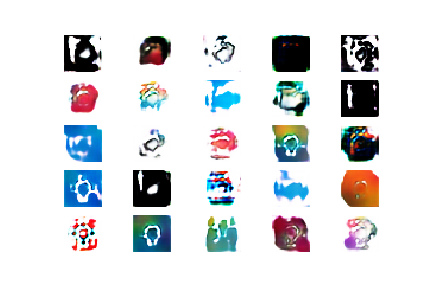

In [8]:
Image.open(save_path + "29800.png")

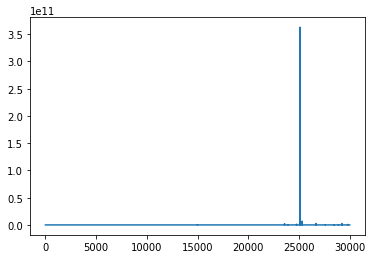

In [9]:
plt.plot(d_loss)

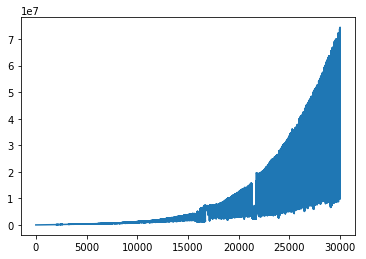

In [10]:
plt.plot(d_acc)

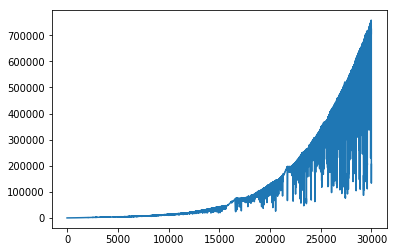

In [11]:
plt.plot(g_loss)

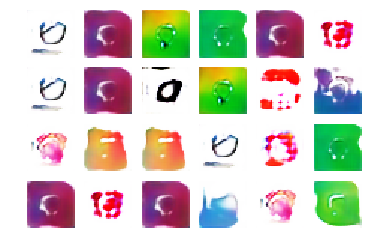

In [12]:
r, c = 4, 4
noise = np.random.normal(0, 1, (r * c, 100))

gen_imgs = gan.generator.predict(noise)
gen_imgs = 0.5 * gen_imgs + 0.5

random_samples(gen_imgs, mode)

In [ ]:
plt.imshow(gen_imgs[1])

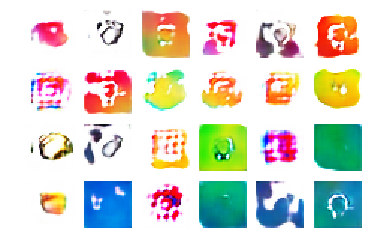

In [17]:
r,c,steps = 4,6,32
interpol = interpolation(gan,r*c,steps)
anim = animation(interpol,mode,r,c,steps)
HTML(anim.to_jshtml())

## For saving the animation:
#anim.save('line.gif', dpi=80, writer='imagemagick')
# with reflection:
#animation(interpol + interpol[::-1], mode,r,c,steps*2).save('line.gif', dpi=80, writer='imagemagick')
# if it's not looping, use 'convert line.gif -loop 0 anim.gif' (using imagemagick)

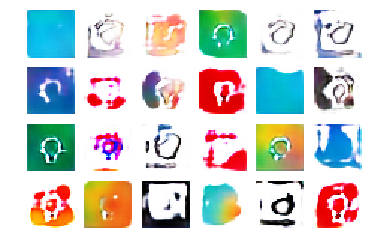

In [16]:
animation(interpol + interpol[::-1], mode,r,c,steps*2).save('iwgan2.gif', dpi=80, writer='pillow')
gan.generator_model.save_weights('iwgan2_g.h5')
gan.critic_model.save_weights('iwgan2_d.h5')